In [1]:
!nvidia-smi 

Tue Jan 21 04:13:21 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.33.01    Driver Version: 440.33.01    CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 206...  Off  | 00000000:08:00.0 Off |                  N/A |
| 68%   60C    P0    49W / 175W |      0MiB /  7979MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce RTX 206...  Off  | 00000000:09:00.0 Off |                  N/A |
| 36%   44C    P0    20W / 175W |      0MiB /  7982MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
        

In [2]:
'''import sys
sys.stdout = open('/dev/stdout', 'w')'''

"import sys\nsys.stdout = open('/dev/stdout', 'w')"

In [3]:
!ls

01_CNN.ipynb			 deepscln_jan20.pt	  nohup.out
SC_CNN_v0.ipynb			 elastic_test.ipynb	  parallel.py
SC_CNN_v0.py			 ln_jan20_testresult.csv  sized_val
SC_CNN_v0_deepSC_Ln_jan20.ipynb  mnist_4x		  sized_val.tar.gz
Untitled.ipynb			 mnist_4x.tar.gz	  test.csv
__pycache__			 mnist_png.tar		  total_acc_no_size.csv
class_acc_no_size.csv		 mnist_sized		  total_acc_sized.csv
class_acc_sized.csv		 mnist_sized.tar.gz	  untitled.txt
data				 mnist_sized_trans.ipynb


In [4]:
DATA_PATH = ''

In [5]:
import os

In [6]:
#!tar -zxvf 'mnist_4x.tar.gz'

In [7]:
INTERNAL_DATA_PATH = 'mnist_4x/'
INTERNAL_DATA_PATH_MAIN = 'mnist_4x/resized'
INTERNAL_DATA_PATH_OTHER = 'mnist_4x/centered'

In [8]:
import os
import fnmatch
 
# Get a list of all files in directory
for rootDir, subdirs, filenames in os.walk(INTERNAL_DATA_PATH):
    # Find the files that matches the given patterm
    for filename in fnmatch.filter(filenames, '.*'):
        try:
            #print(filename)
            os.remove(os.path.join(rootDir, filename))
        except OSError:
            print("Error while deleting file")

In [9]:
from time import sleep
from tqdm import tqdm
for _ in tqdm(range(10)):
    sleep(0.001)

100%|██████████| 10/10 [00:00<00:00, 936.48it/s]


In [10]:
#os.mkdir('data')

In [11]:
'''import cv2
import os

new_path = ['data/ds6']#['data/ds1','data/ds2','data/ds3','data/ds4','data/ds5']
img_size = [3]#[729,243,81,27,9]  

for l in range(1):
    os.mkdir(new_path[l])
    for i in os.listdir(INTERNAL_DATA_PATH_MAIN):
        os.mkdir(os.path.join(new_path[l],i))
        for j in os.listdir(os.path.join(INTERNAL_DATA_PATH_MAIN,i)):
            os.mkdir(os.path.join(new_path[l],i,j))
            for k in tqdm(os.listdir(os.path.join(INTERNAL_DATA_PATH_MAIN,i,j))):
                img_origin = cv2.imread(os.path.join(INTERNAL_DATA_PATH_MAIN,i,j,k))
                img_resized = cv2.resize(img_origin,(img_size[l],img_size[l]))
                cv2.imwrite(os.path.join(new_path[l],i,j,k),img_resized)'''

"import cv2\nimport os\n\nnew_path = ['data/ds6']#['data/ds1','data/ds2','data/ds3','data/ds4','data/ds5']\nimg_size = [3]#[729,243,81,27,9]  \n\nfor l in range(1):\n    os.mkdir(new_path[l])\n    for i in os.listdir(INTERNAL_DATA_PATH_MAIN):\n        os.mkdir(os.path.join(new_path[l],i))\n        for j in os.listdir(os.path.join(INTERNAL_DATA_PATH_MAIN,i)):\n            os.mkdir(os.path.join(new_path[l],i,j))\n            for k in tqdm(os.listdir(os.path.join(INTERNAL_DATA_PATH_MAIN,i,j))):\n                img_origin = cv2.imread(os.path.join(INTERNAL_DATA_PATH_MAIN,i,j,k))\n                img_resized = cv2.resize(img_origin,(img_size[l],img_size[l]))\n                cv2.imwrite(os.path.join(new_path[l],i,j,k),img_resized)"

In [12]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torchvision
import torch
from torch.utils.data import Dataset, DataLoader
import os
import matplotlib.pyplot as plt
import numpy as np


In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [14]:
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#net = Net()
#if torch.cuda.device_count() > 1:
#    net = nn.DataParallel(net)
#net.to(device)


In [15]:
class SizedMnistDataset(Dataset):
    def __init__(self,dir_list,transform=None):
        self.dir_list = dir_list
        self.transform = transform
        
        self.dataset_list = []
        for i in range(len(dir_list)):
            temp_dataset = datasets.ImageFolder(root=self.dir_list[i],transform = self.transform)
            self.dataset_list.append(temp_dataset)
        
    def __len__(self):
        return len(self.dataset_list[0])
    
    def __getitem__(self,idx):
        return self.dataset_list[0][idx],self.dataset_list[1][idx],self.dataset_list[2][idx],self.dataset_list[3][idx],self.dataset_list[4][idx]
    

In [16]:
new_path = ['data/ds2','data/ds3','data/ds4','data/ds5','data/ds6']

train_dataset_path = [x+"/training" for x in new_path]
test_dataset_path = [x+"/testing" for x in new_path]
test_dataset_path

['data/ds2/testing',
 'data/ds3/testing',
 'data/ds4/testing',
 'data/ds5/testing',
 'data/ds6/testing']

In [17]:
img_size = [729,243,81,27,9]  

transform = transforms.Compose(
    [
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainMnistDataset = SizedMnistDataset(train_dataset_path,transform)
testMnistDataset = SizedMnistDataset(test_dataset_path,transform)

trainloader = torch.utils.data.DataLoader(trainMnistDataset,
                                          batch_size = 32, 
                                          shuffle=True,
                                         num_workers=8)

testloader = torch.utils.data.DataLoader(testMnistDataset,
                                          batch_size = 32, 
                                          shuffle=False,
                                        num_workers=8)


In [18]:
'''temptrainloader = torch.utils.data.DataLoader(temp_dataset,
                                          batch_size = 32, 
                                          shuffle=True)
for i,image in enumerate(temptrainloader):
    print(image[0].size())
    break'''

'temptrainloader = torch.utils.data.DataLoader(temp_dataset,\n                                          batch_size = 32, \n                                          shuffle=True)\nfor i,image in enumerate(temptrainloader):\n    print(image[0].size())\n    break'

In [19]:
'''def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

for j in range(10):
    for i,image in tqdm(enumerate(trainloader)):
        if(i==0):
            print(image[0][0].size())
            print(image[0][1])
            print(image[1][1])
            print(image[2][1])
            print(image[3][1])
            print(image[4][1])'''
    
'''imshow(image[0][0])
plt.show()
imshow(image[1][0])
plt.show()
imshow(image[2][0])
plt.show()
imshow(image[3][0])
plt.show()
imshow(image[4][0])
plt.show()'''


'imshow(image[0][0])\nplt.show()\nimshow(image[1][0])\nplt.show()\nimshow(image[2][0])\nplt.show()\nimshow(image[3][0])\nplt.show()\nimshow(image[4][0])\nplt.show()'

In [20]:
'''import matplotlib.pyplot as plt
import numpy as np

# 이미지를 보여주기 위한 함수


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader)
images = dataiter.next()

for i,images in enumerate(trainloader):
    print(images[0].shape)
    imshow(images[0][0][0])
    plt.show()
    imshow(images[0][0][1])
    plt.show()
    imshow(images[0][0][2])
    plt.show()
    imshow(images[0][0][3])
    plt.show()
    imshow(images[0][0][4])
    plt.show()
    break

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join('%5s' % labels[j] for j in range(4)))
plt.show()'''

"import matplotlib.pyplot as plt\nimport numpy as np\n\n# 이미지를 보여주기 위한 함수\n\n\ndef imshow(img):\n    img = img / 2 + 0.5     # unnormalize\n    npimg = img.numpy()\n    plt.imshow(np.transpose(npimg, (1, 2, 0)))\n\n\n# 학습용 이미지를 무작위로 가져오기\ndataiter = iter(trainloader)\nimages = dataiter.next()\n\nfor i,images in enumerate(trainloader):\n    print(images[0].shape)\n    imshow(images[0][0][0])\n    plt.show()\n    imshow(images[0][0][1])\n    plt.show()\n    imshow(images[0][0][2])\n    plt.show()\n    imshow(images[0][0][3])\n    plt.show()\n    imshow(images[0][0][4])\n    plt.show()\n    break\n\n# 이미지 보여주기\nimshow(torchvision.utils.make_grid(images))\n# 정답(label) 출력\nprint(' '.join('%5s' % labels[j] for j in range(4)))\nplt.show()"

In [21]:
import torch.nn as nn
import torch.nn.functional as F

class SCModule(nn.Module):
    def __init__(self,in_channels,out_channels,output_number):
        super(SCModule, self).__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.output_number = output_number

        self.conv1 = nn.Conv2d(in_channels, out_channels, 9, stride=9, padding=4)
        self.conv2 = nn.Conv2d(in_channels, out_channels, 3, stride=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels, out_channels, 1)
        
    def forward(self, x):
        #print(self.out_channels)
        if self.output_number == 3:
            x_1_1 = self.conv1(x[0])
            x_1_2 = self.conv1(x[1])
            x_1_3 = self.conv1(x[2])
            
            x_2_1 = self.conv2(x[1])
            x_2_2 = self.conv2(x[2])
            x_2_3 = self.conv2(x[3])
            
            x_3_1 = self.conv3(x[2])
            x_3_2 = self.conv3(x[3])
            x_3_3 = self.conv3(x[4])
            
            o_1_1 = torch.stack([x_1_1,x_2_1,x_3_1])
            o_1_1 = torch.sum(o_1_1,0)
            
            o_1_2 = torch.stack([x_2_1,x_3_1])
            o_1_2 = torch.sum(o_1_2,0)
            
            o_2_1 = torch.stack([x_1_2,x_2_2,x_3_2])
            o_2_1 = torch.sum(o_2_1,0)
            
            o_2_2 = torch.stack([x_2_2,x_3_2])
            o_2_2 = torch.sum(o_2_2,0)
            
            o_3_1 = torch.stack([x_1_3,x_2_3,x_3_3])
            o_3_1 = torch.sum(o_3_1,0)
            
            o_3_2 = torch.stack([x_2_3,x_3_3])
            o_3_2 = torch.sum(o_3_2,0)
            
            return [torch.cat([o_1_1,o_1_2,x_3_1],dim=1),
                    torch.cat([o_2_1,o_2_2,x_3_2],dim=1),
                    torch.cat([o_3_1,o_3_2,x_3_3],dim=1)]
    
        if self.output_number == 1:
            outputs = []
            x_1_1 = self.conv1(x[0]) 
            x_1_2 = self.conv2(x[1]) 
            x_1_3 = self.conv3(x[2]) 
            #return [x_1_1,x_1_2,x_1_3]
            x_1 = torch.stack([x_1_1,x_1_2,x_1_3])
            x_1 = torch.sum(x_1,0)
            #print(x_1.size())
            #x_1 = torch.cat([x_1_1,x_1_2],dim=1)
            outputs.append(x_1)
            return outputs
        
            
        '''outputs = []
        for i in range(self.output_number):
            x_1_1 = self.conv1(x[0+i]) 
            x_1_2 = self.conv2(x[1+i]) 
            x_1_3 = self.conv3(x[2+i]) 
            #return [x_1_1,x_1_2,x_1_3]
            x_1 = torch.stack([x_1_1,x_1_2,x_1_3])
            x_1 = torch.sum(x_1,0)
            #print(x_1.size())
            #x_1 = torch.cat([x_1_1,x_1_2],dim=1)
            outputs.append(x_1)
        return outputs'''
    

    
#model = SCModule(3,6,3)

In [22]:
'''for i,(d1,d2,d3,d4,d5) in enumerate(zip(trainloader1,trainloader2,trainloader3,trainloader4,trainloader5)):
    print(d1[0][0].shape)
    imshow(d1[0][0])
    plt.show()
    imshow(d2[0][0])
    plt.show()
    imshow(d3[0][0])
    plt.show()
    imshow(d4[0][0])
    plt.show()
    imshow(d5[0][0])
    plt.show()

    print(d1[0].shape)

    o1,o2,o3 = model(d1[0],d2[0],d3[0],d4[0],d5[0])

    print(o1.shape)
    break
'''

'for i,(d1,d2,d3,d4,d5) in enumerate(zip(trainloader1,trainloader2,trainloader3,trainloader4,trainloader5)):\n    print(d1[0][0].shape)\n    imshow(d1[0][0])\n    plt.show()\n    imshow(d2[0][0])\n    plt.show()\n    imshow(d3[0][0])\n    plt.show()\n    imshow(d4[0][0])\n    plt.show()\n    imshow(d5[0][0])\n    plt.show()\n\n    print(d1[0].shape)\n\n    o1,o2,o3 = model(d1[0],d2[0],d3[0],d4[0],d5[0])\n\n    print(o1.shape)\n    break\n'

In [23]:
'''tensor = torch.tensor((), dtype=torch.float64,device='cuda')
pad2_1 = tensor.new_zeros((32,16,729,729))#.to('cuda')
pad2_1[:,:6,:,:].size()'''

"tensor = torch.tensor((), dtype=torch.float64,device='cuda')\npad2_1 = tensor.new_zeros((32,16,729,729))#.to('cuda')\npad2_1[:,:6,:,:].size()"

In [24]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.sc1 = SCModule(3,6,3) 
        self.bn1_1 = nn.BatchNorm2d(18)
        self.bn1_2 = nn.BatchNorm2d(18)
        self.bn1_3 = nn.BatchNorm2d(18)
        self.sc2 = SCModule(18,10,3)
        self.bn2_1 = nn.BatchNorm2d(30)
        self.bn2_2 = nn.BatchNorm2d(30)
        self.bn2_3 = nn.BatchNorm2d(30)
        self.sc3 = SCModule(30,15,3)
        self.bn3_1 = nn.BatchNorm2d(45)
        self.bn3_2 = nn.BatchNorm2d(45)
        self.bn3_3 = nn.BatchNorm2d(45)
        self.sc4 = SCModule(45,20,3)
        self.bn4_1 = nn.BatchNorm2d(60)
        self.bn4_2 = nn.BatchNorm2d(60)
        self.bn4_3 = nn.BatchNorm2d(60)
        self.sc5 = SCModule(60,90,1)
        self.bn5 = nn.BatchNorm2d(90)
        #self.sc3 = SCModule(20,15,1)
        #self.fc1_1 = nn.Linear(6*81*81,500)
        #self.fc1_2 = nn.Linear(6*27*27,500)
        #self.fc1_3 = nn.Linear(6*9*9,500)
        
        self.fc2 = nn.Linear(90*3*3,120)
        #self.bnfc2 = nn.BatchNorm1d(120)
        #self.fc2 = nn.Linear(1500,120)
        self.fc3 = nn.Linear(120,84)
        #self.bnfc3 = nn.BatchNorm1d(84)
        self.fc4 = nn.Linear(84,10)
        
        tensor = torch.tensor((), dtype=torch.float)
 
        self.pad1 = tensor.new_zeros((32,60,243,243))#.to('cuda')
        self.pad2 = tensor.new_zeros((32,60,81,81))#.to('cuda')


    def forward(self, i1,i2,i3,i4,i5):
        self.pad1 = self.pad1.to(i1.device)
        self.pad2 = self.pad2.to(i1.device)
        x1_1,x1_2,x1_3 = self.sc1([i1,i2,i3,i4,i5])
        #x1_2,x1_3 = self.sc1([i2,i3,i4,i5])
        x1_1 = F.relu(self.bn1_1(x1_1))
        x1_2 = F.relu(self.bn1_2(x1_2))
        x1_3 = F.relu(self.bn1_3(x1_3))
        
        #print(x1_1)
        #print(self.pad1)
        bat_size = x1_1.size()[0]
        chan_size = x1_1.size()[1]
        x2_1,x2_2,x2_3 = self.sc2([self.pad1[:bat_size,:chan_size,:,:],self.pad2[:bat_size,:chan_size,:,:],x1_1,x1_2,x1_3])
        #x1_2,x1_3 = self.sc1([i2,i3,i4,i5])
        x2_1 = F.relu(self.bn2_1(x2_1))
        x2_2 = F.relu(self.bn2_2(x2_2))
        x2_3 = F.relu(self.bn2_3(x2_3))
        
        bat_size = x2_1.size()[0]
        chan_size = x2_1.size()[1]
        x3_1,x3_2,x3_3 = self.sc3([self.pad1[:bat_size,:chan_size,:,:],self.pad2[:bat_size,:chan_size,:,:],x2_1,x2_2,x2_3])
        #x1_2,x1_3 = self.sc1([i2,i3,i4,i5])
        x3_1 = F.relu(self.bn3_1(x3_1))
        x3_2 = F.relu(self.bn3_2(x3_2))
        x3_3 = F.relu(self.bn3_3(x3_3))
        
        bat_size = x3_1.size()[0]
        chan_size = x3_1.size()[1]
        x4_1,x4_2,x4_3 = self.sc4([self.pad1[:bat_size,:chan_size,:,:],self.pad2[:bat_size,:chan_size,:,:],x3_1,x3_2,x3_3])
        #x1_2,x1_3 = self.sc1([i2,i3,i4,i5])
        x4_1 = F.relu(self.bn4_1(x4_1))
        x4_2 = F.relu(self.bn4_2(x4_2))
        x4_3 = F.relu(self.bn4_3(x4_3))
    
        #print(x1_1.size())
        
        #x1_1 = x1_1.view(-1,6*81*81)
        #x1_2 = x1_2.view(-1,6*27*27)
        #x1_3 = x1_3.view(-1,6*9*9)
        
        #x1_1 = F.relu(self.fc1_1(x1_1))
        #x1_2 = F.relu(self.fc1_2(x1_2))
        #x1_3 = F.relu(self.fc1_3(x1_3))
        
        #x2 = torch.cat([x1_1,x1_2,x1_3],dim=1)
        
        x2 = self.sc5([x4_1,x4_2,x4_3])
        x2 = F.relu(self.bn5(x2[0]))
        
        #print(x2.size())
        
        #print(x2_1.size())
        
        #print(x3.size())
        
        x2 = x2.view(-1, 90 * 3 * 3)
        x2 = F.relu(self.fc2(x2))
        x2 = F.relu(self.fc3(x2))
        x2 = self.fc4(x2)
        #print(x4.shape)
        return x2

In [25]:
from parallel import DataParallelModel,DataParallelCriterion
from torch.nn.parallel.data_parallel import DataParallel
from torch.nn.parallel import DistributedDataParallel as DDP
import torch.distributed as dist

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device_ids = [0,1]
#os.environ['MASTER_ADDR'] = '127.0.0.1'
#os.environ['MASTER_PORT'] = '29500'
#dist.init_process_group(backend='nccl',rank=0,world_size=1)
model = Net()#.to('cuda:0')
if torch.cuda.device_count() > 10:
    model = DataParallel(model)
model.to(device)

Net(
  (sc1): SCModule(
    (conv1): Conv2d(3, 6, kernel_size=(9, 9), stride=(9, 9), padding=(4, 4))
    (conv2): Conv2d(3, 6, kernel_size=(3, 3), stride=(3, 3), padding=(1, 1))
    (conv3): Conv2d(3, 6, kernel_size=(1, 1), stride=(1, 1))
  )
  (bn1_1): BatchNorm2d(18, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn1_2): BatchNorm2d(18, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn1_3): BatchNorm2d(18, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (sc2): SCModule(
    (conv1): Conv2d(18, 10, kernel_size=(9, 9), stride=(9, 9), padding=(4, 4))
    (conv2): Conv2d(18, 10, kernel_size=(3, 3), stride=(3, 3), padding=(1, 1))
    (conv3): Conv2d(18, 10, kernel_size=(1, 1), stride=(1, 1))
  )
  (bn2_1): BatchNorm2d(30, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2_2): BatchNorm2d(30, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2_3): BatchNorm2d(30, eps=1e-05, momentum=0.1, affine

In [26]:
print(device)

cuda


In [27]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
#criterion = DataParallelCriterion(criterion,device_ids=[0,1])
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [28]:
SIZED_VAL_PATH = 'sized_val'
new_path = []
for i in os.listdir('mnist_sized'):
    #print(i)
    temp = []
    for j in range(1,6):
        temp.append(os.path.join(SIZED_VAL_PATH,str(i),'ds'+str(j)))
    new_path.append(temp)

new_path.sort(key=lambda x:int(x[0].split('/')[1]))

val_gen_arr = []
for i in tqdm(range(0,len(new_path))):
    transform = transforms.Compose(
        [
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    testMnistDataset = SizedMnistDataset(new_path[i],transform)

    testloader = torch.utils.data.DataLoader(testMnistDataset,
                                              batch_size = 32, 
                                              shuffle=False,
                                            num_workers=8)
    val_gen_arr.append(testloader)
#
#val_gen_arr
accuracy = []


100%|██████████| 112/112 [00:01<00:00, 107.95it/s]


In [29]:
import torch.optim as optim
from tqdm import tqdm
import sys

trn_loss_list = []
val_loss_list = []
acc_list = []
num_batches = len(trainloader)
for epoch in range(30):
    running_loss = 0.0
    model.train()
    #device = 'cuda:0'
    for i,images in tqdm(enumerate(trainloader)):
        #data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        c1 = images[0][0].to(device)
        c2 = images[1][0].to(device)
        c3 = images[2][0].to(device)
        c4 = images[3][0].to(device)
        c5 = images[4][0].to(device)
        c6 = images[0][1].to(device)
        #c61 = c6[:128].to('cuda:0')
        #c62 = c6[128:].to('cuda:1')
        output = model(c1,c2,c3,c4,c5)
        #output = torch.nn.parallel.gather(output,'cuda:1')
        loss = criterion(output, c6)
        loss.backward()    # calc gradients
        optimizer.step()   # update gradients
        running_loss += loss.item()
        #print(i)
    
    model.eval()
    with torch.no_grad(): # very very very very important!!!
        val_loss = 0.0
        class_correct = list(0. for i in range(10))
        class_total = list(0. for i in range(10))
        correct = 0
        total = 0
        for j,val in enumerate(testloader):
            v1 = val[0][0].to(device)
            v2 = val[1][0].to(device)
            v3 = val[2][0].to(device)
            v4 = val[3][0].to(device)
            v5 = val[4][0].to(device)
            val_labels = val[0][1].to(device)
            val_output = model(v1,v2,v3,v4,v5)
            v_loss = criterion(val_output, val_labels)
            val_loss += v_loss
            _, predicted = torch.max(val_output, 1)
            c = (predicted == val_labels).squeeze()
            total += val_labels.size(0)
            correct += (predicted == val_labels).sum().item()
            for i in range(len(val_labels)):
                val_label = val_labels[i]
                class_correct[val_label] += c[i].item()
                class_total[val_label] += 1

        for i in range(10):
            if class_total[i]==0:
                print('class_total = 0',class_correct,class_total)
            else:
                print('Accuracy of %5s : %2d %%' % (i, 100 * class_correct[i] / class_total[i]))

    print("epoch: {}/{} | step: {}/{} | trn loss: {:.4f} | val loss: {:.4f}".format(
        epoch+1, 30, i+1, num_batches, running_loss / 1875, val_loss / len(testloader)
    ))        
    print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

    trn_loss_list.append(running_loss/1875)
    val_loss_list.append(val_loss/len(testloader))
    running_loss = 0.0
    
    temp_acc = []
    for testloader in tqdm(val_gen_arr):
        correct = 0
        total = 0
        class_correct = list(0. for i in range(10))
        class_total = list(0. for i in range(10))
        with torch.no_grad():
            for images in testloader:
                c1 = images[0][0].to(device)
                c2 = images[1][0].to(device)
                c3 = images[2][0].to(device)
                c4 = images[3][0].to(device)
                c5 = images[4][0].to(device)
                val_labels = images[0][1].to(device)
                outputs = model(c1,c2,c3,c4,c5)
                _, predicted = torch.max(outputs.data, 1)
                c = (predicted == val_labels).squeeze()
                total += val_labels.size(0)
                correct += (predicted == val_labels).sum().item()
        #print(total,correct,end='')

        print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))
        temp_acc.append(100 * correct / total)
    acc_list.append(temp_acc)
        
    #optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
    

1875it [00:57, 32.45it/s]
  0%|          | 0/112 [00:00<?, ?it/s]

Accuracy of     0 : 99 %
Accuracy of     1 : 99 %
Accuracy of     2 : 100 %
Accuracy of     3 : 98 %
Accuracy of     4 : 99 %
Accuracy of     5 : 100 %
Accuracy of     6 : 99 %
Accuracy of     7 : 97 %
Accuracy of     8 : 96 %
Accuracy of     9 : 94 %
epoch: 1/30 | step: 10/1875 | trn loss: 0.1410 | val loss: 0.0625
Accuracy of the network on the 10000 test images: 98 %


  1%|          | 1/112 [00:00<01:50,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


  2%|▏         | 2/112 [00:01<01:49,  1.01it/s]

Accuracy of the network on the 10000 test images: 10 %


  3%|▎         | 3/112 [00:02<01:48,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


  4%|▎         | 4/112 [00:03<01:47,  1.01it/s]

Accuracy of the network on the 10000 test images: 10 %


  4%|▍         | 5/112 [00:04<01:46,  1.01it/s]

Accuracy of the network on the 10000 test images: 10 %


  5%|▌         | 6/112 [00:05<01:45,  1.01it/s]

Accuracy of the network on the 10000 test images: 10 %


  6%|▋         | 7/112 [00:06<01:44,  1.01it/s]

Accuracy of the network on the 10000 test images: 10 %


  7%|▋         | 8/112 [00:07<01:43,  1.01it/s]

Accuracy of the network on the 10000 test images: 10 %


  8%|▊         | 9/112 [00:08<01:42,  1.01it/s]

Accuracy of the network on the 10000 test images: 10 %


  9%|▉         | 10/112 [00:09<01:41,  1.01it/s]

Accuracy of the network on the 10000 test images: 10 %


 10%|▉         | 11/112 [00:10<01:40,  1.01it/s]

Accuracy of the network on the 10000 test images: 10 %


 11%|█         | 12/112 [00:11<01:38,  1.01it/s]

Accuracy of the network on the 10000 test images: 10 %


 12%|█▏        | 13/112 [00:12<01:37,  1.01it/s]

Accuracy of the network on the 10000 test images: 10 %


 12%|█▎        | 14/112 [00:13<01:37,  1.01it/s]

Accuracy of the network on the 10000 test images: 10 %


 13%|█▎        | 15/112 [00:14<01:36,  1.01it/s]

Accuracy of the network on the 10000 test images: 10 %


 14%|█▍        | 16/112 [00:15<01:35,  1.01it/s]

Accuracy of the network on the 10000 test images: 10 %


 15%|█▌        | 17/112 [00:16<01:34,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


 16%|█▌        | 18/112 [00:17<01:33,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


 17%|█▋        | 19/112 [00:18<01:32,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


 18%|█▊        | 20/112 [00:19<01:31,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


 19%|█▉        | 21/112 [00:20<01:30,  1.01it/s]

Accuracy of the network on the 10000 test images: 10 %


 20%|█▉        | 22/112 [00:21<01:29,  1.01it/s]

Accuracy of the network on the 10000 test images: 10 %


 21%|██        | 23/112 [00:22<01:28,  1.01it/s]

Accuracy of the network on the 10000 test images: 10 %


 21%|██▏       | 24/112 [00:23<01:27,  1.01it/s]

Accuracy of the network on the 10000 test images: 10 %


 22%|██▏       | 25/112 [00:24<01:26,  1.01it/s]

Accuracy of the network on the 10000 test images: 10 %


 23%|██▎       | 26/112 [00:25<01:25,  1.01it/s]

Accuracy of the network on the 10000 test images: 10 %


 24%|██▍       | 27/112 [00:26<01:24,  1.01it/s]

Accuracy of the network on the 10000 test images: 10 %


 25%|██▌       | 28/112 [00:27<01:23,  1.01it/s]

Accuracy of the network on the 10000 test images: 10 %


 26%|██▌       | 29/112 [00:28<01:22,  1.01it/s]

Accuracy of the network on the 10000 test images: 10 %


 27%|██▋       | 30/112 [00:29<01:21,  1.01it/s]

Accuracy of the network on the 10000 test images: 10 %


 28%|██▊       | 31/112 [00:30<01:20,  1.01it/s]

Accuracy of the network on the 10000 test images: 11 %


 29%|██▊       | 32/112 [00:31<01:19,  1.01it/s]

Accuracy of the network on the 10000 test images: 11 %


 29%|██▉       | 33/112 [00:32<01:18,  1.01it/s]

Accuracy of the network on the 10000 test images: 11 %


 30%|███       | 34/112 [00:33<01:17,  1.01it/s]

Accuracy of the network on the 10000 test images: 12 %


 31%|███▏      | 35/112 [00:34<01:16,  1.01it/s]

Accuracy of the network on the 10000 test images: 13 %


 32%|███▏      | 36/112 [00:35<01:15,  1.00it/s]

Accuracy of the network on the 10000 test images: 12 %


 33%|███▎      | 37/112 [00:36<01:14,  1.00it/s]

Accuracy of the network on the 10000 test images: 15 %


 34%|███▍      | 38/112 [00:37<01:13,  1.00it/s]

Accuracy of the network on the 10000 test images: 15 %


 35%|███▍      | 39/112 [00:38<01:12,  1.01it/s]

Accuracy of the network on the 10000 test images: 16 %


 36%|███▌      | 40/112 [00:39<01:11,  1.01it/s]

Accuracy of the network on the 10000 test images: 17 %


 37%|███▋      | 41/112 [00:40<01:10,  1.00it/s]

Accuracy of the network on the 10000 test images: 19 %


 38%|███▊      | 42/112 [00:41<01:09,  1.00it/s]

Accuracy of the network on the 10000 test images: 19 %


 38%|███▊      | 43/112 [00:42<01:08,  1.00it/s]

Accuracy of the network on the 10000 test images: 20 %


 39%|███▉      | 44/112 [00:43<01:07,  1.00it/s]

Accuracy of the network on the 10000 test images: 21 %


 40%|████      | 45/112 [00:44<01:06,  1.01it/s]

Accuracy of the network on the 10000 test images: 23 %


 41%|████      | 46/112 [00:45<01:05,  1.00it/s]

Accuracy of the network on the 10000 test images: 24 %


 42%|████▏     | 47/112 [00:46<01:04,  1.00it/s]

Accuracy of the network on the 10000 test images: 26 %


 43%|████▎     | 48/112 [00:47<01:03,  1.00it/s]

Accuracy of the network on the 10000 test images: 28 %


 44%|████▍     | 49/112 [00:48<01:02,  1.00it/s]

Accuracy of the network on the 10000 test images: 29 %


 45%|████▍     | 50/112 [00:49<01:01,  1.00it/s]

Accuracy of the network on the 10000 test images: 33 %


 46%|████▌     | 51/112 [00:50<01:00,  1.01it/s]

Accuracy of the network on the 10000 test images: 33 %


 46%|████▋     | 52/112 [00:51<00:59,  1.01it/s]

Accuracy of the network on the 10000 test images: 37 %


 47%|████▋     | 53/112 [00:52<00:58,  1.01it/s]

Accuracy of the network on the 10000 test images: 36 %


 48%|████▊     | 54/112 [00:53<00:57,  1.01it/s]

Accuracy of the network on the 10000 test images: 41 %


 49%|████▉     | 55/112 [00:54<00:57,  1.00s/it]

Accuracy of the network on the 10000 test images: 42 %


 50%|█████     | 56/112 [00:55<00:56,  1.00s/it]

Accuracy of the network on the 10000 test images: 46 %


 51%|█████     | 57/112 [00:56<00:54,  1.00it/s]

Accuracy of the network on the 10000 test images: 45 %


 52%|█████▏    | 58/112 [00:57<00:53,  1.01it/s]

Accuracy of the network on the 10000 test images: 49 %


 53%|█████▎    | 59/112 [00:58<00:52,  1.00it/s]

Accuracy of the network on the 10000 test images: 48 %


 54%|█████▎    | 60/112 [00:59<00:51,  1.01it/s]

Accuracy of the network on the 10000 test images: 53 %


 54%|█████▍    | 61/112 [01:00<00:50,  1.00it/s]

Accuracy of the network on the 10000 test images: 54 %


 55%|█████▌    | 62/112 [01:01<00:49,  1.00it/s]

Accuracy of the network on the 10000 test images: 58 %


 56%|█████▋    | 63/112 [01:02<00:48,  1.01it/s]

Accuracy of the network on the 10000 test images: 59 %


 57%|█████▋    | 64/112 [01:03<00:47,  1.01it/s]

Accuracy of the network on the 10000 test images: 63 %


 58%|█████▊    | 65/112 [01:04<00:46,  1.01it/s]

Accuracy of the network on the 10000 test images: 62 %


 59%|█████▉    | 66/112 [01:05<00:45,  1.01it/s]

Accuracy of the network on the 10000 test images: 67 %


 60%|█████▉    | 67/112 [01:06<00:44,  1.01it/s]

Accuracy of the network on the 10000 test images: 66 %


 61%|██████    | 68/112 [01:07<00:43,  1.01it/s]

Accuracy of the network on the 10000 test images: 70 %


 62%|██████▏   | 69/112 [01:08<00:42,  1.00it/s]

Accuracy of the network on the 10000 test images: 71 %


 62%|██████▎   | 70/112 [01:09<00:41,  1.00it/s]

Accuracy of the network on the 10000 test images: 76 %


 63%|██████▎   | 71/112 [01:10<00:40,  1.01it/s]

Accuracy of the network on the 10000 test images: 76 %


 64%|██████▍   | 72/112 [01:11<00:39,  1.01it/s]

Accuracy of the network on the 10000 test images: 80 %


 65%|██████▌   | 73/112 [01:12<00:38,  1.01it/s]

Accuracy of the network on the 10000 test images: 80 %


 66%|██████▌   | 74/112 [01:13<00:37,  1.01it/s]

Accuracy of the network on the 10000 test images: 83 %


 67%|██████▋   | 75/112 [01:14<00:36,  1.01it/s]

Accuracy of the network on the 10000 test images: 82 %


 68%|██████▊   | 76/112 [01:15<00:35,  1.00it/s]

Accuracy of the network on the 10000 test images: 84 %


 69%|██████▉   | 77/112 [01:16<00:34,  1.00it/s]

Accuracy of the network on the 10000 test images: 85 %


 70%|██████▉   | 78/112 [01:17<00:33,  1.00it/s]

Accuracy of the network on the 10000 test images: 87 %


 71%|███████   | 79/112 [01:18<00:32,  1.01it/s]

Accuracy of the network on the 10000 test images: 88 %


 71%|███████▏  | 80/112 [01:19<00:31,  1.01it/s]

Accuracy of the network on the 10000 test images: 89 %


 72%|███████▏  | 81/112 [01:20<00:30,  1.01it/s]

Accuracy of the network on the 10000 test images: 89 %


 73%|███████▎  | 82/112 [01:21<00:29,  1.01it/s]

Accuracy of the network on the 10000 test images: 91 %


 74%|███████▍  | 83/112 [01:22<00:28,  1.01it/s]

Accuracy of the network on the 10000 test images: 91 %


 75%|███████▌  | 84/112 [01:23<00:27,  1.00it/s]

Accuracy of the network on the 10000 test images: 92 %


 76%|███████▌  | 85/112 [01:24<00:26,  1.00it/s]

Accuracy of the network on the 10000 test images: 92 %


 77%|███████▋  | 86/112 [01:25<00:26,  1.00s/it]

Accuracy of the network on the 10000 test images: 93 %


 78%|███████▊  | 87/112 [01:26<00:24,  1.00it/s]

Accuracy of the network on the 10000 test images: 93 %


 79%|███████▊  | 88/112 [01:27<00:24,  1.00s/it]

Accuracy of the network on the 10000 test images: 94 %


 79%|███████▉  | 89/112 [01:28<00:23,  1.01s/it]

Accuracy of the network on the 10000 test images: 94 %


 80%|████████  | 90/112 [01:29<00:22,  1.00s/it]

Accuracy of the network on the 10000 test images: 95 %


 81%|████████▏ | 91/112 [01:30<00:20,  1.00it/s]

Accuracy of the network on the 10000 test images: 95 %


 82%|████████▏ | 92/112 [01:31<00:19,  1.00it/s]

Accuracy of the network on the 10000 test images: 95 %


 83%|████████▎ | 93/112 [01:32<00:18,  1.01it/s]

Accuracy of the network on the 10000 test images: 96 %


 84%|████████▍ | 94/112 [01:33<00:17,  1.01it/s]

Accuracy of the network on the 10000 test images: 96 %


 85%|████████▍ | 95/112 [01:34<00:16,  1.01it/s]

Accuracy of the network on the 10000 test images: 96 %


 86%|████████▌ | 96/112 [01:35<00:15,  1.00it/s]

Accuracy of the network on the 10000 test images: 96 %


 87%|████████▋ | 97/112 [01:36<00:14,  1.00it/s]

Accuracy of the network on the 10000 test images: 97 %


 88%|████████▊ | 98/112 [01:37<00:13,  1.00it/s]

Accuracy of the network on the 10000 test images: 97 %


 88%|████████▊ | 99/112 [01:38<00:12,  1.01it/s]

Accuracy of the network on the 10000 test images: 97 %


 89%|████████▉ | 100/112 [01:39<00:11,  1.01it/s]

Accuracy of the network on the 10000 test images: 97 %


 90%|█████████ | 101/112 [01:40<00:10,  1.00it/s]

Accuracy of the network on the 10000 test images: 97 %


 91%|█████████ | 102/112 [01:41<00:09,  1.01it/s]

Accuracy of the network on the 10000 test images: 97 %


 92%|█████████▏| 103/112 [01:42<00:08,  1.01it/s]

Accuracy of the network on the 10000 test images: 97 %


 93%|█████████▎| 104/112 [01:43<00:07,  1.01it/s]

Accuracy of the network on the 10000 test images: 97 %


 94%|█████████▍| 105/112 [01:44<00:06,  1.01it/s]

Accuracy of the network on the 10000 test images: 97 %


 95%|█████████▍| 106/112 [01:45<00:05,  1.01it/s]

Accuracy of the network on the 10000 test images: 98 %


 96%|█████████▌| 107/112 [01:46<00:04,  1.00it/s]

Accuracy of the network on the 10000 test images: 97 %


 96%|█████████▋| 108/112 [01:47<00:03,  1.00it/s]

Accuracy of the network on the 10000 test images: 98 %


 97%|█████████▋| 109/112 [01:48<00:02,  1.00it/s]

Accuracy of the network on the 10000 test images: 98 %


 98%|█████████▊| 110/112 [01:49<00:02,  1.00s/it]

Accuracy of the network on the 10000 test images: 98 %


 99%|█████████▉| 111/112 [01:50<00:00,  1.00it/s]

Accuracy of the network on the 10000 test images: 97 %


100%|██████████| 112/112 [01:51<00:00,  1.01it/s]

Accuracy of the network on the 10000 test images: 98 %



1875it [00:58, 32.12it/s]
  0%|          | 0/112 [00:00<?, ?it/s]

Accuracy of     0 : 100 %
Accuracy of     1 : 100 %
Accuracy of     2 : 99 %
Accuracy of     3 : 100 %
Accuracy of     4 : 98 %
Accuracy of     5 : 97 %
Accuracy of     6 : 99 %
Accuracy of     7 : 98 %
Accuracy of     8 : 95 %
Accuracy of     9 : 97 %
epoch: 2/30 | step: 10/1875 | trn loss: 0.0560 | val loss: 0.0471
Accuracy of the network on the 10000 test images: 98 %


  1%|          | 1/112 [00:00<01:49,  1.02it/s]

Accuracy of the network on the 10000 test images: 10 %


  2%|▏         | 2/112 [00:01<01:48,  1.01it/s]

Accuracy of the network on the 10000 test images: 10 %


  3%|▎         | 3/112 [00:02<01:47,  1.01it/s]

Accuracy of the network on the 10000 test images: 10 %


  4%|▎         | 4/112 [00:03<01:47,  1.01it/s]

Accuracy of the network on the 10000 test images: 10 %


  4%|▍         | 5/112 [00:04<01:46,  1.01it/s]

Accuracy of the network on the 10000 test images: 10 %


  5%|▌         | 6/112 [00:05<01:45,  1.01it/s]

Accuracy of the network on the 10000 test images: 10 %


  6%|▋         | 7/112 [00:06<01:44,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


  7%|▋         | 8/112 [00:07<01:43,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


  8%|▊         | 9/112 [00:08<01:43,  1.00s/it]

Accuracy of the network on the 10000 test images: 10 %


  9%|▉         | 10/112 [00:09<01:41,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


 10%|▉         | 11/112 [00:10<01:41,  1.00s/it]

Accuracy of the network on the 10000 test images: 10 %


 11%|█         | 12/112 [00:11<01:40,  1.00s/it]

Accuracy of the network on the 10000 test images: 10 %


 12%|█▏        | 13/112 [00:12<01:39,  1.00s/it]

Accuracy of the network on the 10000 test images: 10 %


 12%|█▎        | 14/112 [00:13<01:37,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


 13%|█▎        | 15/112 [00:14<01:36,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


 14%|█▍        | 16/112 [00:15<01:35,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


 15%|█▌        | 17/112 [00:16<01:34,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


 16%|█▌        | 18/112 [00:17<01:34,  1.00s/it]

Accuracy of the network on the 10000 test images: 10 %


 17%|█▋        | 19/112 [00:18<01:33,  1.01s/it]

Accuracy of the network on the 10000 test images: 10 %


 18%|█▊        | 20/112 [00:19<01:32,  1.00s/it]

Accuracy of the network on the 10000 test images: 10 %


 19%|█▉        | 21/112 [00:20<01:31,  1.00s/it]

Accuracy of the network on the 10000 test images: 10 %


 20%|█▉        | 22/112 [00:21<01:30,  1.00s/it]

Accuracy of the network on the 10000 test images: 10 %


 21%|██        | 23/112 [00:22<01:28,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


 21%|██▏       | 24/112 [00:23<01:27,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


 22%|██▏       | 25/112 [00:24<01:26,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


 23%|██▎       | 26/112 [00:25<01:25,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


 24%|██▍       | 27/112 [00:26<01:24,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


 25%|██▌       | 28/112 [00:27<01:24,  1.00s/it]

Accuracy of the network on the 10000 test images: 11 %


 26%|██▌       | 29/112 [00:28<01:23,  1.00s/it]

Accuracy of the network on the 10000 test images: 11 %


 27%|██▋       | 30/112 [00:29<01:21,  1.00it/s]

Accuracy of the network on the 10000 test images: 12 %


 28%|██▊       | 31/112 [00:30<01:21,  1.00s/it]

Accuracy of the network on the 10000 test images: 13 %


 29%|██▊       | 32/112 [00:31<01:20,  1.00s/it]

Accuracy of the network on the 10000 test images: 14 %


 29%|██▉       | 33/112 [00:32<01:18,  1.00it/s]

Accuracy of the network on the 10000 test images: 14 %


 30%|███       | 34/112 [00:33<01:17,  1.00it/s]

Accuracy of the network on the 10000 test images: 15 %


 31%|███▏      | 35/112 [00:34<01:17,  1.01s/it]

Accuracy of the network on the 10000 test images: 15 %


 32%|███▏      | 36/112 [00:35<01:16,  1.00s/it]

Accuracy of the network on the 10000 test images: 15 %


 33%|███▎      | 37/112 [00:36<01:15,  1.00s/it]

Accuracy of the network on the 10000 test images: 16 %


 34%|███▍      | 38/112 [00:37<01:13,  1.00it/s]

Accuracy of the network on the 10000 test images: 17 %


 35%|███▍      | 39/112 [00:38<01:12,  1.00it/s]

Accuracy of the network on the 10000 test images: 18 %


 36%|███▌      | 40/112 [00:39<01:12,  1.00s/it]

Accuracy of the network on the 10000 test images: 19 %


 37%|███▋      | 41/112 [00:40<01:11,  1.00s/it]

Accuracy of the network on the 10000 test images: 19 %


 38%|███▊      | 42/112 [00:41<01:09,  1.00it/s]

Accuracy of the network on the 10000 test images: 21 %


 38%|███▊      | 43/112 [00:42<01:08,  1.01it/s]

Accuracy of the network on the 10000 test images: 22 %


 39%|███▉      | 44/112 [00:43<01:07,  1.00it/s]

Accuracy of the network on the 10000 test images: 24 %


 40%|████      | 45/112 [00:44<01:06,  1.00it/s]

Accuracy of the network on the 10000 test images: 24 %


 41%|████      | 46/112 [00:45<01:05,  1.00it/s]

Accuracy of the network on the 10000 test images: 28 %


 42%|████▏     | 47/112 [00:46<01:04,  1.00it/s]

Accuracy of the network on the 10000 test images: 28 %


 43%|████▎     | 48/112 [00:47<01:03,  1.00it/s]

Accuracy of the network on the 10000 test images: 33 %


 44%|████▍     | 49/112 [00:48<01:02,  1.00it/s]

Accuracy of the network on the 10000 test images: 34 %


 45%|████▍     | 50/112 [00:49<01:01,  1.00it/s]

Accuracy of the network on the 10000 test images: 38 %


 46%|████▌     | 51/112 [00:50<01:00,  1.00it/s]

Accuracy of the network on the 10000 test images: 36 %


 46%|████▋     | 52/112 [00:51<01:00,  1.00s/it]

Accuracy of the network on the 10000 test images: 43 %


 47%|████▋     | 53/112 [00:52<00:59,  1.00s/it]

Accuracy of the network on the 10000 test images: 39 %


 48%|████▊     | 54/112 [00:53<00:58,  1.00s/it]

Accuracy of the network on the 10000 test images: 46 %


 49%|████▉     | 55/112 [00:54<00:57,  1.00s/it]

Accuracy of the network on the 10000 test images: 44 %


 50%|█████     | 56/112 [00:55<00:55,  1.00it/s]

Accuracy of the network on the 10000 test images: 50 %


 51%|█████     | 57/112 [00:56<00:54,  1.01it/s]

Accuracy of the network on the 10000 test images: 46 %


 52%|█████▏    | 58/112 [00:57<00:53,  1.01it/s]

Accuracy of the network on the 10000 test images: 52 %


 53%|█████▎    | 59/112 [00:58<00:52,  1.01it/s]

Accuracy of the network on the 10000 test images: 49 %


 54%|█████▎    | 60/112 [00:59<00:52,  1.00s/it]

Accuracy of the network on the 10000 test images: 57 %


 54%|█████▍    | 61/112 [01:00<00:50,  1.00it/s]

Accuracy of the network on the 10000 test images: 55 %


 55%|█████▌    | 62/112 [01:01<00:49,  1.00it/s]

Accuracy of the network on the 10000 test images: 60 %


 56%|█████▋    | 63/112 [01:02<00:48,  1.00it/s]

Accuracy of the network on the 10000 test images: 60 %


 57%|█████▋    | 64/112 [01:03<00:47,  1.00it/s]

Accuracy of the network on the 10000 test images: 65 %


 58%|█████▊    | 65/112 [01:04<00:47,  1.00s/it]

Accuracy of the network on the 10000 test images: 63 %


 59%|█████▉    | 66/112 [01:05<00:46,  1.00s/it]

Accuracy of the network on the 10000 test images: 69 %


 60%|█████▉    | 67/112 [01:06<00:45,  1.00s/it]

Accuracy of the network on the 10000 test images: 65 %


 61%|██████    | 68/112 [01:07<00:44,  1.00s/it]

Accuracy of the network on the 10000 test images: 72 %


 62%|██████▏   | 69/112 [01:08<00:43,  1.00s/it]

Accuracy of the network on the 10000 test images: 70 %


 62%|██████▎   | 70/112 [01:09<00:42,  1.00s/it]

Accuracy of the network on the 10000 test images: 77 %


 63%|██████▎   | 71/112 [01:10<00:41,  1.00s/it]

Accuracy of the network on the 10000 test images: 74 %


 64%|██████▍   | 72/112 [01:11<00:40,  1.00s/it]

Accuracy of the network on the 10000 test images: 80 %


 65%|██████▌   | 73/112 [01:12<00:39,  1.00s/it]

Accuracy of the network on the 10000 test images: 78 %


 66%|██████▌   | 74/112 [01:13<00:38,  1.00s/it]

Accuracy of the network on the 10000 test images: 83 %


 67%|██████▋   | 75/112 [01:14<00:37,  1.00s/it]

Accuracy of the network on the 10000 test images: 81 %


 68%|██████▊   | 76/112 [01:15<00:35,  1.00it/s]

Accuracy of the network on the 10000 test images: 86 %


 69%|██████▉   | 77/112 [01:16<00:34,  1.00it/s]

Accuracy of the network on the 10000 test images: 85 %


 70%|██████▉   | 78/112 [01:17<00:33,  1.00it/s]

Accuracy of the network on the 10000 test images: 88 %


 71%|███████   | 79/112 [01:18<00:32,  1.00it/s]

Accuracy of the network on the 10000 test images: 87 %


 71%|███████▏  | 80/112 [01:19<00:32,  1.00s/it]

Accuracy of the network on the 10000 test images: 89 %


 72%|███████▏  | 81/112 [01:20<00:31,  1.00s/it]

Accuracy of the network on the 10000 test images: 88 %


 73%|███████▎  | 82/112 [01:21<00:29,  1.00it/s]

Accuracy of the network on the 10000 test images: 91 %


 74%|███████▍  | 83/112 [01:22<00:29,  1.00s/it]

Accuracy of the network on the 10000 test images: 89 %


 75%|███████▌  | 84/112 [01:23<00:28,  1.00s/it]

Accuracy of the network on the 10000 test images: 92 %


 76%|███████▌  | 85/112 [01:24<00:27,  1.00s/it]

Accuracy of the network on the 10000 test images: 93 %


 77%|███████▋  | 86/112 [01:25<00:26,  1.00s/it]

Accuracy of the network on the 10000 test images: 94 %


 78%|███████▊  | 87/112 [01:26<00:25,  1.01s/it]

Accuracy of the network on the 10000 test images: 94 %


 79%|███████▊  | 88/112 [01:27<00:24,  1.01s/it]

Accuracy of the network on the 10000 test images: 95 %


 79%|███████▉  | 89/112 [01:28<00:23,  1.00s/it]

Accuracy of the network on the 10000 test images: 95 %


 80%|████████  | 90/112 [01:29<00:22,  1.01s/it]

Accuracy of the network on the 10000 test images: 96 %


 81%|████████▏ | 91/112 [01:30<00:21,  1.00s/it]

Accuracy of the network on the 10000 test images: 96 %


 82%|████████▏ | 92/112 [01:31<00:19,  1.00it/s]

Accuracy of the network on the 10000 test images: 96 %


 83%|████████▎ | 93/112 [01:32<00:18,  1.00it/s]

Accuracy of the network on the 10000 test images: 96 %


 84%|████████▍ | 94/112 [01:33<00:17,  1.01it/s]

Accuracy of the network on the 10000 test images: 97 %


 85%|████████▍ | 95/112 [01:34<00:16,  1.00it/s]

Accuracy of the network on the 10000 test images: 97 %


 86%|████████▌ | 96/112 [01:35<00:15,  1.00it/s]

Accuracy of the network on the 10000 test images: 97 %


 87%|████████▋ | 97/112 [01:36<00:14,  1.00it/s]

Accuracy of the network on the 10000 test images: 98 %


 88%|████████▊ | 98/112 [01:37<00:13,  1.00it/s]

Accuracy of the network on the 10000 test images: 98 %


 88%|████████▊ | 99/112 [01:38<00:12,  1.01it/s]

Accuracy of the network on the 10000 test images: 98 %


 89%|████████▉ | 100/112 [01:39<00:11,  1.01it/s]

Accuracy of the network on the 10000 test images: 98 %


 90%|█████████ | 101/112 [01:40<00:10,  1.01it/s]

Accuracy of the network on the 10000 test images: 98 %


 91%|█████████ | 102/112 [01:41<00:09,  1.01it/s]

Accuracy of the network on the 10000 test images: 98 %


 92%|█████████▏| 103/112 [01:42<00:08,  1.01it/s]

Accuracy of the network on the 10000 test images: 98 %


 93%|█████████▎| 104/112 [01:43<00:08,  1.00s/it]

Accuracy of the network on the 10000 test images: 98 %


 94%|█████████▍| 105/112 [01:44<00:07,  1.00s/it]

Accuracy of the network on the 10000 test images: 98 %


 95%|█████████▍| 106/112 [01:45<00:06,  1.00s/it]

Accuracy of the network on the 10000 test images: 98 %


 96%|█████████▌| 107/112 [01:46<00:05,  1.00s/it]

Accuracy of the network on the 10000 test images: 98 %


 96%|█████████▋| 108/112 [01:47<00:03,  1.00it/s]

Accuracy of the network on the 10000 test images: 98 %


 97%|█████████▋| 109/112 [01:48<00:03,  1.00s/it]

Accuracy of the network on the 10000 test images: 98 %


 98%|█████████▊| 110/112 [01:49<00:01,  1.00it/s]

Accuracy of the network on the 10000 test images: 98 %


 99%|█████████▉| 111/112 [01:50<00:00,  1.00it/s]

Accuracy of the network on the 10000 test images: 98 %


100%|██████████| 112/112 [01:51<00:00,  1.00it/s]

Accuracy of the network on the 10000 test images: 98 %



1875it [00:58, 32.12it/s]
  0%|          | 0/112 [00:00<?, ?it/s]

Accuracy of     0 : 99 %
Accuracy of     1 : 100 %
Accuracy of     2 : 100 %
Accuracy of     3 : 97 %
Accuracy of     4 : 99 %
Accuracy of     5 : 99 %
Accuracy of     6 : 98 %
Accuracy of     7 : 99 %
Accuracy of     8 : 98 %
Accuracy of     9 : 95 %
epoch: 3/30 | step: 10/1875 | trn loss: 0.0397 | val loss: 0.0414
Accuracy of the network on the 10000 test images: 98 %


  1%|          | 1/112 [00:00<01:49,  1.01it/s]

Accuracy of the network on the 10000 test images: 10 %


  2%|▏         | 2/112 [00:01<01:48,  1.01it/s]

Accuracy of the network on the 10000 test images: 10 %


  3%|▎         | 3/112 [00:02<01:47,  1.01it/s]

Accuracy of the network on the 10000 test images: 10 %


  4%|▎         | 4/112 [00:03<01:47,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


  4%|▍         | 5/112 [00:04<01:46,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


  5%|▌         | 6/112 [00:05<01:46,  1.00s/it]

Accuracy of the network on the 10000 test images: 10 %


  6%|▋         | 7/112 [00:06<01:45,  1.00s/it]

Accuracy of the network on the 10000 test images: 10 %


  7%|▋         | 8/112 [00:07<01:44,  1.00s/it]

Accuracy of the network on the 10000 test images: 10 %


  8%|▊         | 9/112 [00:08<01:43,  1.00s/it]

Accuracy of the network on the 10000 test images: 10 %


  9%|▉         | 10/112 [00:09<01:41,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


 10%|▉         | 11/112 [00:10<01:41,  1.00s/it]

Accuracy of the network on the 10000 test images: 10 %


 11%|█         | 12/112 [00:12<01:40,  1.00s/it]

Accuracy of the network on the 10000 test images: 10 %


 12%|█▏        | 13/112 [00:13<01:39,  1.00s/it]

Accuracy of the network on the 10000 test images: 10 %


 12%|█▎        | 14/112 [00:13<01:37,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


 13%|█▎        | 15/112 [00:14<01:36,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


 14%|█▍        | 16/112 [00:15<01:35,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


 15%|█▌        | 17/112 [00:16<01:34,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


 16%|█▌        | 18/112 [00:17<01:33,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


 17%|█▋        | 19/112 [00:18<01:32,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


 18%|█▊        | 20/112 [00:19<01:31,  1.01it/s]

Accuracy of the network on the 10000 test images: 10 %


 19%|█▉        | 21/112 [00:20<01:30,  1.01it/s]

Accuracy of the network on the 10000 test images: 10 %


 20%|█▉        | 22/112 [00:21<01:29,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


 21%|██        | 23/112 [00:22<01:28,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


 21%|██▏       | 24/112 [00:23<01:27,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


 22%|██▏       | 25/112 [00:24<01:26,  1.01it/s]

Accuracy of the network on the 10000 test images: 10 %


 23%|██▎       | 26/112 [00:25<01:25,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


 24%|██▍       | 27/112 [00:26<01:24,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


 25%|██▌       | 28/112 [00:27<01:23,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


 26%|██▌       | 29/112 [00:28<01:23,  1.01s/it]

Accuracy of the network on the 10000 test images: 10 %


 27%|██▋       | 30/112 [00:29<01:22,  1.00s/it]

Accuracy of the network on the 10000 test images: 10 %


 28%|██▊       | 31/112 [00:30<01:20,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


 29%|██▊       | 32/112 [00:31<01:19,  1.00it/s]

Accuracy of the network on the 10000 test images: 11 %


 29%|██▉       | 33/112 [00:32<01:18,  1.00it/s]

Accuracy of the network on the 10000 test images: 11 %


 30%|███       | 34/112 [00:33<01:17,  1.00it/s]

Accuracy of the network on the 10000 test images: 12 %


 31%|███▏      | 35/112 [00:34<01:16,  1.00it/s]

Accuracy of the network on the 10000 test images: 13 %


 32%|███▏      | 36/112 [00:35<01:15,  1.00it/s]

Accuracy of the network on the 10000 test images: 13 %


 33%|███▎      | 37/112 [00:36<01:15,  1.00s/it]

Accuracy of the network on the 10000 test images: 14 %


 34%|███▍      | 38/112 [00:37<01:13,  1.00it/s]

Accuracy of the network on the 10000 test images: 15 %


 35%|███▍      | 39/112 [00:38<01:13,  1.00s/it]

Accuracy of the network on the 10000 test images: 16 %


 36%|███▌      | 40/112 [00:39<01:12,  1.00s/it]

Accuracy of the network on the 10000 test images: 17 %


 37%|███▋      | 41/112 [00:40<01:10,  1.00it/s]

Accuracy of the network on the 10000 test images: 20 %


 38%|███▊      | 42/112 [00:41<01:10,  1.00s/it]

Accuracy of the network on the 10000 test images: 21 %


 38%|███▊      | 43/112 [00:42<01:08,  1.00it/s]

Accuracy of the network on the 10000 test images: 23 %


 39%|███▉      | 44/112 [00:43<01:07,  1.01it/s]

Accuracy of the network on the 10000 test images: 25 %


 40%|████      | 45/112 [00:44<01:06,  1.00it/s]

Accuracy of the network on the 10000 test images: 28 %


 41%|████      | 46/112 [00:45<01:05,  1.01it/s]

Accuracy of the network on the 10000 test images: 31 %


 42%|████▏     | 47/112 [00:46<01:04,  1.00it/s]

Accuracy of the network on the 10000 test images: 32 %


 43%|████▎     | 48/112 [00:47<01:03,  1.00it/s]

Accuracy of the network on the 10000 test images: 35 %


 44%|████▍     | 49/112 [00:48<01:03,  1.00s/it]

Accuracy of the network on the 10000 test images: 38 %


 45%|████▍     | 50/112 [00:49<01:02,  1.00s/it]

Accuracy of the network on the 10000 test images: 40 %


 46%|████▌     | 51/112 [00:50<01:01,  1.01s/it]

Accuracy of the network on the 10000 test images: 40 %


 46%|████▋     | 52/112 [00:51<01:00,  1.00s/it]

Accuracy of the network on the 10000 test images: 45 %


 47%|████▋     | 53/112 [00:52<00:59,  1.00s/it]

Accuracy of the network on the 10000 test images: 44 %


 48%|████▊     | 54/112 [00:53<00:58,  1.00s/it]

Accuracy of the network on the 10000 test images: 49 %


 49%|████▉     | 55/112 [00:54<00:57,  1.00s/it]

Accuracy of the network on the 10000 test images: 50 %


 50%|█████     | 56/112 [00:55<00:56,  1.00s/it]

Accuracy of the network on the 10000 test images: 55 %


 51%|█████     | 57/112 [00:56<00:55,  1.00s/it]

Accuracy of the network on the 10000 test images: 53 %


 52%|█████▏    | 58/112 [00:57<00:53,  1.00it/s]

Accuracy of the network on the 10000 test images: 58 %


 53%|█████▎    | 59/112 [00:58<00:53,  1.00s/it]

Accuracy of the network on the 10000 test images: 55 %


 54%|█████▎    | 60/112 [00:59<00:52,  1.00s/it]

Accuracy of the network on the 10000 test images: 61 %


 54%|█████▍    | 61/112 [01:00<00:51,  1.00s/it]

Accuracy of the network on the 10000 test images: 60 %


 55%|█████▌    | 62/112 [01:01<00:50,  1.00s/it]

Accuracy of the network on the 10000 test images: 63 %


 56%|█████▋    | 63/112 [01:02<00:49,  1.00s/it]

Accuracy of the network on the 10000 test images: 64 %


 57%|█████▋    | 64/112 [01:03<00:47,  1.00it/s]

Accuracy of the network on the 10000 test images: 68 %


 58%|█████▊    | 65/112 [01:04<00:46,  1.00it/s]

Accuracy of the network on the 10000 test images: 66 %


 59%|█████▉    | 66/112 [01:05<00:45,  1.01it/s]

Accuracy of the network on the 10000 test images: 71 %


 60%|█████▉    | 67/112 [01:06<00:44,  1.01it/s]

Accuracy of the network on the 10000 test images: 70 %


 61%|██████    | 68/112 [01:07<00:43,  1.00it/s]

Accuracy of the network on the 10000 test images: 74 %


 62%|██████▏   | 69/112 [01:08<00:43,  1.00s/it]

Accuracy of the network on the 10000 test images: 74 %


 62%|██████▎   | 70/112 [01:09<00:41,  1.00it/s]

Accuracy of the network on the 10000 test images: 79 %


 63%|██████▎   | 71/112 [01:10<00:40,  1.00it/s]

Accuracy of the network on the 10000 test images: 78 %


 64%|██████▍   | 72/112 [01:11<00:40,  1.00s/it]

Accuracy of the network on the 10000 test images: 82 %


 65%|██████▌   | 73/112 [01:12<00:39,  1.00s/it]

Accuracy of the network on the 10000 test images: 82 %


 66%|██████▌   | 74/112 [01:13<00:38,  1.00s/it]

Accuracy of the network on the 10000 test images: 85 %


 67%|██████▋   | 75/112 [01:14<00:37,  1.00s/it]

Accuracy of the network on the 10000 test images: 84 %


 68%|██████▊   | 76/112 [01:15<00:36,  1.00s/it]

Accuracy of the network on the 10000 test images: 88 %


 69%|██████▉   | 77/112 [01:16<00:34,  1.00it/s]

Accuracy of the network on the 10000 test images: 88 %


 70%|██████▉   | 78/112 [01:17<00:34,  1.00s/it]

Accuracy of the network on the 10000 test images: 91 %


 71%|███████   | 79/112 [01:18<00:33,  1.00s/it]

Accuracy of the network on the 10000 test images: 90 %


 71%|███████▏  | 80/112 [01:19<00:32,  1.00s/it]

Accuracy of the network on the 10000 test images: 92 %


 72%|███████▏  | 81/112 [01:20<00:31,  1.00s/it]

Accuracy of the network on the 10000 test images: 91 %


 73%|███████▎  | 82/112 [01:21<00:30,  1.00s/it]

Accuracy of the network on the 10000 test images: 94 %


 74%|███████▍  | 83/112 [01:22<00:29,  1.00s/it]

Accuracy of the network on the 10000 test images: 94 %


 75%|███████▌  | 84/112 [01:23<00:28,  1.00s/it]

Accuracy of the network on the 10000 test images: 95 %


 76%|███████▌  | 85/112 [01:24<00:27,  1.00s/it]

Accuracy of the network on the 10000 test images: 95 %


 77%|███████▋  | 86/112 [01:25<00:26,  1.00s/it]

Accuracy of the network on the 10000 test images: 96 %


 78%|███████▊  | 87/112 [01:26<00:24,  1.00it/s]

Accuracy of the network on the 10000 test images: 96 %


 79%|███████▊  | 88/112 [01:27<00:23,  1.00it/s]

Accuracy of the network on the 10000 test images: 97 %


 79%|███████▉  | 89/112 [01:28<00:22,  1.00it/s]

Accuracy of the network on the 10000 test images: 97 %


 80%|████████  | 90/112 [01:29<00:21,  1.00it/s]

Accuracy of the network on the 10000 test images: 98 %


 81%|████████▏ | 91/112 [01:30<00:20,  1.00it/s]

Accuracy of the network on the 10000 test images: 98 %


 82%|████████▏ | 92/112 [01:31<00:20,  1.00s/it]

Accuracy of the network on the 10000 test images: 98 %


 83%|████████▎ | 93/112 [01:32<00:19,  1.00s/it]

Accuracy of the network on the 10000 test images: 98 %


 84%|████████▍ | 94/112 [01:33<00:18,  1.00s/it]

Accuracy of the network on the 10000 test images: 99 %


 85%|████████▍ | 95/112 [01:34<00:17,  1.00s/it]

Accuracy of the network on the 10000 test images: 99 %


 86%|████████▌ | 96/112 [01:35<00:16,  1.00s/it]

Accuracy of the network on the 10000 test images: 99 %


 87%|████████▋ | 97/112 [01:36<00:15,  1.00s/it]

Accuracy of the network on the 10000 test images: 99 %


 88%|████████▊ | 98/112 [01:37<00:14,  1.00s/it]

Accuracy of the network on the 10000 test images: 99 %


 88%|████████▊ | 99/112 [01:38<00:13,  1.01s/it]

Accuracy of the network on the 10000 test images: 98 %


 89%|████████▉ | 100/112 [01:40<00:12,  1.01s/it]

Accuracy of the network on the 10000 test images: 98 %


 90%|█████████ | 101/112 [01:40<00:11,  1.00s/it]

Accuracy of the network on the 10000 test images: 98 %


 91%|█████████ | 102/112 [01:42<00:10,  1.00s/it]

Accuracy of the network on the 10000 test images: 98 %


 92%|█████████▏| 103/112 [01:42<00:08,  1.00it/s]

Accuracy of the network on the 10000 test images: 98 %


 93%|█████████▎| 104/112 [01:43<00:08,  1.00s/it]

Accuracy of the network on the 10000 test images: 98 %


 94%|█████████▍| 105/112 [01:44<00:06,  1.00it/s]

Accuracy of the network on the 10000 test images: 98 %


 95%|█████████▍| 106/112 [01:45<00:05,  1.00it/s]

Accuracy of the network on the 10000 test images: 98 %


 96%|█████████▌| 107/112 [01:46<00:04,  1.00it/s]

Accuracy of the network on the 10000 test images: 98 %


 96%|█████████▋| 108/112 [01:47<00:03,  1.00it/s]

Accuracy of the network on the 10000 test images: 98 %


 97%|█████████▋| 109/112 [01:48<00:02,  1.01it/s]

Accuracy of the network on the 10000 test images: 98 %


 98%|█████████▊| 110/112 [01:49<00:01,  1.00it/s]

Accuracy of the network on the 10000 test images: 98 %


 99%|█████████▉| 111/112 [01:50<00:01,  1.00s/it]

Accuracy of the network on the 10000 test images: 98 %


100%|██████████| 112/112 [01:51<00:00,  1.00it/s]

Accuracy of the network on the 10000 test images: 98 %



1875it [00:58, 32.16it/s]
  0%|          | 0/112 [00:00<?, ?it/s]

Accuracy of     0 : 100 %
Accuracy of     1 : 100 %
Accuracy of     2 : 100 %
Accuracy of     3 : 100 %
Accuracy of     4 : 96 %
Accuracy of     5 : 98 %
Accuracy of     6 : 98 %
Accuracy of     7 : 99 %
Accuracy of     8 : 98 %
Accuracy of     9 : 95 %
epoch: 4/30 | step: 10/1875 | trn loss: 0.0322 | val loss: 0.0528
Accuracy of the network on the 10000 test images: 98 %


  1%|          | 1/112 [00:00<01:50,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


  2%|▏         | 2/112 [00:02<01:49,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


  3%|▎         | 3/112 [00:02<01:48,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


  4%|▎         | 4/112 [00:03<01:47,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


  4%|▍         | 5/112 [00:04<01:46,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


  5%|▌         | 6/112 [00:05<01:45,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


  6%|▋         | 7/112 [00:06<01:44,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


  7%|▋         | 8/112 [00:07<01:43,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


  8%|▊         | 9/112 [00:08<01:42,  1.01it/s]

Accuracy of the network on the 10000 test images: 10 %


  9%|▉         | 10/112 [00:09<01:41,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


 10%|▉         | 11/112 [00:10<01:40,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


 11%|█         | 12/112 [00:11<01:39,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


 12%|█▏        | 13/112 [00:12<01:39,  1.00s/it]

Accuracy of the network on the 10000 test images: 10 %


 12%|█▎        | 14/112 [00:13<01:38,  1.00s/it]

Accuracy of the network on the 10000 test images: 10 %


 13%|█▎        | 15/112 [00:14<01:37,  1.00s/it]

Accuracy of the network on the 10000 test images: 10 %


 14%|█▍        | 16/112 [00:15<01:35,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


 15%|█▌        | 17/112 [00:16<01:34,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


 16%|█▌        | 18/112 [00:17<01:33,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


 17%|█▋        | 19/112 [00:18<01:32,  1.01it/s]

Accuracy of the network on the 10000 test images: 10 %


 18%|█▊        | 20/112 [00:19<01:31,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


 19%|█▉        | 21/112 [00:20<01:30,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


 20%|█▉        | 22/112 [00:21<01:29,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


 21%|██        | 23/112 [00:22<01:28,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


 21%|██▏       | 24/112 [00:23<01:28,  1.00s/it]

Accuracy of the network on the 10000 test images: 10 %


 22%|██▏       | 25/112 [00:24<01:27,  1.01s/it]

Accuracy of the network on the 10000 test images: 10 %


 23%|██▎       | 26/112 [00:25<01:26,  1.01s/it]

Accuracy of the network on the 10000 test images: 10 %


 24%|██▍       | 27/112 [00:26<01:25,  1.00s/it]

Accuracy of the network on the 10000 test images: 10 %


 25%|██▌       | 28/112 [00:27<01:23,  1.00it/s]

Accuracy of the network on the 10000 test images: 11 %


 26%|██▌       | 29/112 [00:28<01:22,  1.00it/s]

Accuracy of the network on the 10000 test images: 11 %


 27%|██▋       | 30/112 [00:29<01:21,  1.00it/s]

Accuracy of the network on the 10000 test images: 11 %


 28%|██▊       | 31/112 [00:30<01:21,  1.00s/it]

Accuracy of the network on the 10000 test images: 12 %


 29%|██▊       | 32/112 [00:31<01:19,  1.00it/s]

Accuracy of the network on the 10000 test images: 12 %


 29%|██▉       | 33/112 [00:32<01:18,  1.00it/s]

Accuracy of the network on the 10000 test images: 14 %


 30%|███       | 34/112 [00:33<01:17,  1.00it/s]

Accuracy of the network on the 10000 test images: 13 %


 31%|███▏      | 35/112 [00:34<01:17,  1.00s/it]

Accuracy of the network on the 10000 test images: 15 %


 32%|███▏      | 36/112 [00:35<01:16,  1.00s/it]

Accuracy of the network on the 10000 test images: 16 %


 33%|███▎      | 37/112 [00:36<01:14,  1.00it/s]

Accuracy of the network on the 10000 test images: 19 %


 34%|███▍      | 38/112 [00:37<01:13,  1.00it/s]

Accuracy of the network on the 10000 test images: 19 %


 35%|███▍      | 39/112 [00:38<01:12,  1.00it/s]

Accuracy of the network on the 10000 test images: 22 %


 36%|███▌      | 40/112 [00:39<01:12,  1.00s/it]

Accuracy of the network on the 10000 test images: 23 %


 37%|███▋      | 41/112 [00:40<01:10,  1.00it/s]

Accuracy of the network on the 10000 test images: 27 %


 38%|███▊      | 42/112 [00:41<01:09,  1.00it/s]

Accuracy of the network on the 10000 test images: 28 %


 38%|███▊      | 43/112 [00:42<01:08,  1.01it/s]

Accuracy of the network on the 10000 test images: 31 %


 39%|███▉      | 44/112 [00:43<01:07,  1.01it/s]

Accuracy of the network on the 10000 test images: 32 %


 40%|████      | 45/112 [00:44<01:06,  1.01it/s]

Accuracy of the network on the 10000 test images: 35 %


 41%|████      | 46/112 [00:45<01:05,  1.00it/s]

Accuracy of the network on the 10000 test images: 37 %


 42%|████▏     | 47/112 [00:46<01:04,  1.00it/s]

Accuracy of the network on the 10000 test images: 39 %


 43%|████▎     | 48/112 [00:47<01:03,  1.00it/s]

Accuracy of the network on the 10000 test images: 40 %


 44%|████▍     | 49/112 [00:48<01:03,  1.00s/it]

Accuracy of the network on the 10000 test images: 43 %


 45%|████▍     | 50/112 [00:49<01:02,  1.00s/it]

Accuracy of the network on the 10000 test images: 45 %


 46%|████▌     | 51/112 [00:50<01:01,  1.00s/it]

Accuracy of the network on the 10000 test images: 47 %


 46%|████▋     | 52/112 [00:51<00:59,  1.00it/s]

Accuracy of the network on the 10000 test images: 49 %


 47%|████▋     | 53/112 [00:52<00:58,  1.00it/s]

Accuracy of the network on the 10000 test images: 50 %


 48%|████▊     | 54/112 [00:53<00:58,  1.00s/it]

Accuracy of the network on the 10000 test images: 52 %


 49%|████▉     | 55/112 [00:54<00:57,  1.00s/it]

Accuracy of the network on the 10000 test images: 54 %


 50%|█████     | 56/112 [00:55<00:56,  1.00s/it]

Accuracy of the network on the 10000 test images: 56 %


 51%|█████     | 57/112 [00:56<00:55,  1.00s/it]

Accuracy of the network on the 10000 test images: 57 %


 52%|█████▏    | 58/112 [00:57<00:54,  1.00s/it]

Accuracy of the network on the 10000 test images: 61 %


 53%|█████▎    | 59/112 [00:58<00:53,  1.01s/it]

Accuracy of the network on the 10000 test images: 60 %


 54%|█████▎    | 60/112 [00:59<00:52,  1.01s/it]

Accuracy of the network on the 10000 test images: 63 %


 54%|█████▍    | 61/112 [01:01<00:51,  1.01s/it]

Accuracy of the network on the 10000 test images: 63 %


 55%|█████▌    | 62/112 [01:02<00:50,  1.01s/it]

Accuracy of the network on the 10000 test images: 65 %


 56%|█████▋    | 63/112 [01:03<00:49,  1.01s/it]

Accuracy of the network on the 10000 test images: 67 %


 57%|█████▋    | 64/112 [01:03<00:48,  1.00s/it]

Accuracy of the network on the 10000 test images: 69 %


 58%|█████▊    | 65/112 [01:04<00:46,  1.00it/s]

Accuracy of the network on the 10000 test images: 69 %


 59%|█████▉    | 66/112 [01:05<00:45,  1.00it/s]

Accuracy of the network on the 10000 test images: 72 %


 60%|█████▉    | 67/112 [01:06<00:44,  1.00it/s]

Accuracy of the network on the 10000 test images: 72 %


 61%|██████    | 68/112 [01:07<00:43,  1.00it/s]

Accuracy of the network on the 10000 test images: 76 %


 62%|██████▏   | 69/112 [01:08<00:42,  1.01it/s]

Accuracy of the network on the 10000 test images: 74 %


 62%|██████▎   | 70/112 [01:09<00:42,  1.00s/it]

Accuracy of the network on the 10000 test images: 78 %


 63%|██████▎   | 71/112 [01:10<00:41,  1.00s/it]

Accuracy of the network on the 10000 test images: 77 %


 64%|██████▍   | 72/112 [01:11<00:40,  1.00s/it]

Accuracy of the network on the 10000 test images: 81 %


 65%|██████▌   | 73/112 [01:12<00:39,  1.00s/it]

Accuracy of the network on the 10000 test images: 81 %


 66%|██████▌   | 74/112 [01:13<00:38,  1.00s/it]

Accuracy of the network on the 10000 test images: 85 %


 67%|██████▋   | 75/112 [01:14<00:36,  1.00it/s]

Accuracy of the network on the 10000 test images: 84 %


 68%|██████▊   | 76/112 [01:15<00:36,  1.00s/it]

Accuracy of the network on the 10000 test images: 87 %


 69%|██████▉   | 77/112 [01:16<00:35,  1.00s/it]

Accuracy of the network on the 10000 test images: 87 %


 70%|██████▉   | 78/112 [01:17<00:34,  1.00s/it]

Accuracy of the network on the 10000 test images: 89 %


 71%|███████   | 79/112 [01:18<00:33,  1.00s/it]

Accuracy of the network on the 10000 test images: 89 %


 71%|███████▏  | 80/112 [01:19<00:31,  1.00it/s]

Accuracy of the network on the 10000 test images: 92 %


 72%|███████▏  | 81/112 [01:20<00:30,  1.00it/s]

Accuracy of the network on the 10000 test images: 92 %


 73%|███████▎  | 82/112 [01:21<00:30,  1.00s/it]

Accuracy of the network on the 10000 test images: 94 %


 74%|███████▍  | 83/112 [01:22<00:28,  1.00it/s]

Accuracy of the network on the 10000 test images: 95 %


 75%|███████▌  | 84/112 [01:23<00:27,  1.00it/s]

Accuracy of the network on the 10000 test images: 95 %


 76%|███████▌  | 85/112 [01:24<00:27,  1.00s/it]

Accuracy of the network on the 10000 test images: 95 %


 77%|███████▋  | 86/112 [01:26<00:26,  1.00s/it]

Accuracy of the network on the 10000 test images: 96 %


 78%|███████▊  | 87/112 [01:27<00:25,  1.01s/it]

Accuracy of the network on the 10000 test images: 96 %


 79%|███████▊  | 88/112 [01:28<00:24,  1.00s/it]

Accuracy of the network on the 10000 test images: 96 %


 79%|███████▉  | 89/112 [01:29<00:22,  1.00it/s]

Accuracy of the network on the 10000 test images: 97 %


 80%|████████  | 90/112 [01:30<00:21,  1.00it/s]

Accuracy of the network on the 10000 test images: 97 %


 81%|████████▏ | 91/112 [01:30<00:20,  1.00it/s]

Accuracy of the network on the 10000 test images: 98 %


 82%|████████▏ | 92/112 [01:31<00:19,  1.00it/s]

Accuracy of the network on the 10000 test images: 98 %


 83%|████████▎ | 93/112 [01:32<00:18,  1.00it/s]

Accuracy of the network on the 10000 test images: 98 %


 84%|████████▍ | 94/112 [01:33<00:17,  1.00it/s]

Accuracy of the network on the 10000 test images: 98 %


 85%|████████▍ | 95/112 [01:34<00:16,  1.01it/s]

Accuracy of the network on the 10000 test images: 98 %


 86%|████████▌ | 96/112 [01:35<00:15,  1.00it/s]

Accuracy of the network on the 10000 test images: 98 %


 87%|████████▋ | 97/112 [01:36<00:14,  1.00it/s]

Accuracy of the network on the 10000 test images: 98 %


 88%|████████▊ | 98/112 [01:37<00:14,  1.00s/it]

Accuracy of the network on the 10000 test images: 98 %


 88%|████████▊ | 99/112 [01:38<00:12,  1.00it/s]

Accuracy of the network on the 10000 test images: 98 %


 89%|████████▉ | 100/112 [01:39<00:11,  1.00it/s]

Accuracy of the network on the 10000 test images: 98 %


 90%|█████████ | 101/112 [01:40<00:10,  1.00it/s]

Accuracy of the network on the 10000 test images: 98 %


 91%|█████████ | 102/112 [01:41<00:09,  1.00it/s]

Accuracy of the network on the 10000 test images: 98 %


 92%|█████████▏| 103/112 [01:42<00:08,  1.00it/s]

Accuracy of the network on the 10000 test images: 98 %


 93%|█████████▎| 104/112 [01:43<00:07,  1.00it/s]

Accuracy of the network on the 10000 test images: 98 %


 94%|█████████▍| 105/112 [01:44<00:06,  1.00it/s]

Accuracy of the network on the 10000 test images: 98 %


 95%|█████████▍| 106/112 [01:45<00:06,  1.00s/it]

Accuracy of the network on the 10000 test images: 98 %


 96%|█████████▌| 107/112 [01:46<00:04,  1.00it/s]

Accuracy of the network on the 10000 test images: 98 %


 96%|█████████▋| 108/112 [01:47<00:03,  1.00it/s]

Accuracy of the network on the 10000 test images: 98 %


 97%|█████████▋| 109/112 [01:48<00:02,  1.01it/s]

Accuracy of the network on the 10000 test images: 98 %


 98%|█████████▊| 110/112 [01:49<00:01,  1.01it/s]

Accuracy of the network on the 10000 test images: 98 %


 99%|█████████▉| 111/112 [01:50<00:00,  1.00it/s]

Accuracy of the network on the 10000 test images: 98 %


100%|██████████| 112/112 [01:51<00:00,  1.00it/s]

Accuracy of the network on the 10000 test images: 98 %



1875it [00:58, 32.13it/s]
  0%|          | 0/112 [00:00<?, ?it/s]

Accuracy of     0 : 100 %
Accuracy of     1 : 100 %
Accuracy of     2 : 98 %
Accuracy of     3 : 99 %
Accuracy of     4 : 99 %
Accuracy of     5 : 100 %
Accuracy of     6 : 99 %
Accuracy of     7 : 100 %
Accuracy of     8 : 94 %
Accuracy of     9 : 98 %
epoch: 5/30 | step: 10/1875 | trn loss: 0.0250 | val loss: 0.0484
Accuracy of the network on the 10000 test images: 98 %


  1%|          | 1/112 [00:01<01:51,  1.00s/it]

Accuracy of the network on the 10000 test images: 10 %


  2%|▏         | 2/112 [00:01<01:49,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


  3%|▎         | 3/112 [00:02<01:48,  1.01it/s]

Accuracy of the network on the 10000 test images: 10 %


  4%|▎         | 4/112 [00:03<01:47,  1.01it/s]

Accuracy of the network on the 10000 test images: 10 %


  4%|▍         | 5/112 [00:04<01:46,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


  5%|▌         | 6/112 [00:05<01:45,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


  6%|▋         | 7/112 [00:06<01:45,  1.00s/it]

Accuracy of the network on the 10000 test images: 10 %


  7%|▋         | 8/112 [00:07<01:43,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


  8%|▊         | 9/112 [00:08<01:42,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


  9%|▉         | 10/112 [00:09<01:40,  1.01it/s]

Accuracy of the network on the 10000 test images: 10 %


 10%|▉         | 11/112 [00:10<01:39,  1.01it/s]

Accuracy of the network on the 10000 test images: 10 %


 11%|█         | 12/112 [00:11<01:38,  1.01it/s]

Accuracy of the network on the 10000 test images: 10 %


 12%|█▏        | 13/112 [00:12<01:38,  1.01it/s]

Accuracy of the network on the 10000 test images: 10 %


 12%|█▎        | 14/112 [00:13<01:37,  1.01it/s]

Accuracy of the network on the 10000 test images: 10 %


 13%|█▎        | 15/112 [00:14<01:36,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


 14%|█▍        | 16/112 [00:15<01:35,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


 15%|█▌        | 17/112 [00:16<01:35,  1.00s/it]

Accuracy of the network on the 10000 test images: 10 %


 16%|█▌        | 18/112 [00:17<01:34,  1.00s/it]

Accuracy of the network on the 10000 test images: 10 %


 17%|█▋        | 19/112 [00:18<01:33,  1.00s/it]

Accuracy of the network on the 10000 test images: 10 %


 18%|█▊        | 20/112 [00:19<01:32,  1.00s/it]

Accuracy of the network on the 10000 test images: 10 %


 19%|█▉        | 21/112 [00:20<01:30,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


 20%|█▉        | 22/112 [00:21<01:29,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


 21%|██        | 23/112 [00:22<01:28,  1.01it/s]

Accuracy of the network on the 10000 test images: 10 %


 21%|██▏       | 24/112 [00:23<01:27,  1.01it/s]

Accuracy of the network on the 10000 test images: 10 %


 22%|██▏       | 25/112 [00:24<01:26,  1.01it/s]

Accuracy of the network on the 10000 test images: 10 %


 23%|██▎       | 26/112 [00:25<01:25,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


 24%|██▍       | 27/112 [00:26<01:24,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


 25%|██▌       | 28/112 [00:27<01:24,  1.00s/it]

Accuracy of the network on the 10000 test images: 10 %


 26%|██▌       | 29/112 [00:28<01:22,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


 27%|██▋       | 30/112 [00:29<01:22,  1.00s/it]

Accuracy of the network on the 10000 test images: 10 %


 28%|██▊       | 31/112 [00:30<01:21,  1.00s/it]

Accuracy of the network on the 10000 test images: 10 %


 29%|██▊       | 32/112 [00:31<01:19,  1.00it/s]

Accuracy of the network on the 10000 test images: 10 %


 29%|██▉       | 33/112 [00:32<01:18,  1.00it/s]

Accuracy of the network on the 10000 test images: 11 %


 30%|███       | 34/112 [00:33<01:17,  1.00it/s]

Accuracy of the network on the 10000 test images: 11 %


 31%|███▏      | 35/112 [00:34<01:16,  1.00it/s]

Accuracy of the network on the 10000 test images: 12 %


 32%|███▏      | 36/112 [00:35<01:15,  1.00it/s]

Accuracy of the network on the 10000 test images: 12 %


 33%|███▎      | 37/112 [00:36<01:14,  1.00it/s]

Accuracy of the network on the 10000 test images: 14 %


 34%|███▍      | 38/112 [00:37<01:13,  1.00it/s]

Accuracy of the network on the 10000 test images: 14 %


 35%|███▍      | 39/112 [00:38<01:13,  1.00s/it]

Accuracy of the network on the 10000 test images: 16 %


 36%|███▌      | 40/112 [00:39<01:12,  1.00s/it]

Accuracy of the network on the 10000 test images: 18 %


 37%|███▋      | 41/112 [00:40<01:10,  1.00it/s]

Accuracy of the network on the 10000 test images: 19 %


 38%|███▊      | 42/112 [00:41<01:09,  1.00it/s]

Accuracy of the network on the 10000 test images: 23 %


 38%|███▊      | 43/112 [00:42<01:08,  1.00it/s]

Accuracy of the network on the 10000 test images: 23 %


 39%|███▉      | 44/112 [00:43<01:07,  1.01it/s]

Accuracy of the network on the 10000 test images: 27 %


 40%|████      | 45/112 [00:44<01:06,  1.00it/s]

Accuracy of the network on the 10000 test images: 26 %


 41%|████      | 46/112 [00:45<01:05,  1.00it/s]

Accuracy of the network on the 10000 test images: 31 %


 42%|████▏     | 47/112 [00:46<01:05,  1.00s/it]

Accuracy of the network on the 10000 test images: 31 %


 43%|████▎     | 48/112 [00:47<01:04,  1.00s/it]

Accuracy of the network on the 10000 test images: 37 %


 44%|████▍     | 49/112 [00:48<01:03,  1.00s/it]

Accuracy of the network on the 10000 test images: 36 %


 45%|████▍     | 50/112 [00:49<01:01,  1.00it/s]

Accuracy of the network on the 10000 test images: 41 %


 46%|████▌     | 51/112 [00:50<01:01,  1.00s/it]

Accuracy of the network on the 10000 test images: 39 %


 46%|████▋     | 52/112 [00:51<01:00,  1.00s/it]

Accuracy of the network on the 10000 test images: 45 %


 47%|████▋     | 53/112 [00:52<00:59,  1.00s/it]

Accuracy of the network on the 10000 test images: 42 %


 48%|████▊     | 54/112 [00:53<00:58,  1.00s/it]

Accuracy of the network on the 10000 test images: 48 %


 49%|████▉     | 55/112 [00:54<00:57,  1.01s/it]

Accuracy of the network on the 10000 test images: 46 %


 50%|█████     | 56/112 [00:55<00:56,  1.00s/it]

Accuracy of the network on the 10000 test images: 50 %


 51%|█████     | 57/112 [00:56<00:55,  1.01s/it]

Accuracy of the network on the 10000 test images: 47 %


 52%|█████▏    | 58/112 [00:57<00:54,  1.01s/it]

Accuracy of the network on the 10000 test images: 54 %


 53%|█████▎    | 59/112 [00:58<00:53,  1.00s/it]

Accuracy of the network on the 10000 test images: 51 %


 54%|█████▎    | 60/112 [00:59<00:52,  1.01s/it]

Accuracy of the network on the 10000 test images: 58 %


 54%|█████▍    | 61/112 [01:00<00:51,  1.00s/it]

Accuracy of the network on the 10000 test images: 54 %


 55%|█████▌    | 62/112 [01:01<00:50,  1.01s/it]

Accuracy of the network on the 10000 test images: 60 %


 56%|█████▋    | 63/112 [01:02<00:49,  1.01s/it]

Accuracy of the network on the 10000 test images: 57 %


 57%|█████▋    | 64/112 [01:03<00:48,  1.01s/it]

Accuracy of the network on the 10000 test images: 63 %


 58%|█████▊    | 65/112 [01:04<00:47,  1.00s/it]

Accuracy of the network on the 10000 test images: 59 %


 59%|█████▉    | 66/112 [01:05<00:46,  1.01s/it]

Accuracy of the network on the 10000 test images: 67 %


 60%|█████▉    | 67/112 [01:06<00:45,  1.00s/it]

Accuracy of the network on the 10000 test images: 63 %


 61%|██████    | 68/112 [01:07<00:44,  1.00s/it]

Accuracy of the network on the 10000 test images: 70 %


 62%|██████▏   | 69/112 [01:08<00:42,  1.00it/s]

Accuracy of the network on the 10000 test images: 67 %


 62%|██████▎   | 70/112 [01:09<00:42,  1.00s/it]

Accuracy of the network on the 10000 test images: 73 %


 63%|██████▎   | 71/112 [01:10<00:41,  1.01s/it]

Accuracy of the network on the 10000 test images: 70 %


 64%|██████▍   | 72/112 [01:11<00:40,  1.00s/it]

Accuracy of the network on the 10000 test images: 76 %


 65%|██████▌   | 73/112 [01:12<00:38,  1.00it/s]

Accuracy of the network on the 10000 test images: 74 %


 66%|██████▌   | 74/112 [01:13<00:37,  1.00it/s]

Accuracy of the network on the 10000 test images: 79 %


 67%|██████▋   | 75/112 [01:14<00:37,  1.00s/it]

Accuracy of the network on the 10000 test images: 77 %


 68%|██████▊   | 76/112 [01:15<00:36,  1.00s/it]

Accuracy of the network on the 10000 test images: 82 %


 69%|██████▉   | 77/112 [01:16<00:35,  1.00s/it]

Accuracy of the network on the 10000 test images: 81 %


 70%|██████▉   | 78/112 [01:17<00:33,  1.00it/s]

Accuracy of the network on the 10000 test images: 85 %


 71%|███████   | 79/112 [01:18<00:32,  1.00it/s]

Accuracy of the network on the 10000 test images: 83 %


 71%|███████▏  | 80/112 [01:19<00:31,  1.00it/s]

Accuracy of the network on the 10000 test images: 88 %


 72%|███████▏  | 81/112 [01:20<00:30,  1.00it/s]

Accuracy of the network on the 10000 test images: 87 %


 73%|███████▎  | 82/112 [01:21<00:29,  1.00it/s]

Accuracy of the network on the 10000 test images: 92 %


 74%|███████▍  | 83/112 [01:22<00:28,  1.00it/s]

Accuracy of the network on the 10000 test images: 90 %


 75%|███████▌  | 84/112 [01:23<00:27,  1.00it/s]

Accuracy of the network on the 10000 test images: 92 %


 76%|███████▌  | 85/112 [01:24<00:26,  1.00it/s]

Accuracy of the network on the 10000 test images: 92 %


 77%|███████▋  | 86/112 [01:25<00:25,  1.00it/s]

Accuracy of the network on the 10000 test images: 93 %


 78%|███████▊  | 87/112 [01:26<00:24,  1.00it/s]

Accuracy of the network on the 10000 test images: 93 %


 79%|███████▊  | 88/112 [01:27<00:23,  1.00it/s]

Accuracy of the network on the 10000 test images: 95 %


 79%|███████▉  | 89/112 [01:28<00:23,  1.00s/it]

Accuracy of the network on the 10000 test images: 94 %


 80%|████████  | 90/112 [01:29<00:21,  1.00it/s]

Accuracy of the network on the 10000 test images: 95 %


 81%|████████▏ | 91/112 [01:30<00:20,  1.00it/s]

Accuracy of the network on the 10000 test images: 96 %


 82%|████████▏ | 92/112 [01:31<00:19,  1.00it/s]

Accuracy of the network on the 10000 test images: 96 %


 83%|████████▎ | 93/112 [01:32<00:18,  1.00it/s]

Accuracy of the network on the 10000 test images: 96 %


 84%|████████▍ | 94/112 [01:33<00:17,  1.00it/s]

Accuracy of the network on the 10000 test images: 97 %


 85%|████████▍ | 95/112 [01:34<00:16,  1.00it/s]

Accuracy of the network on the 10000 test images: 97 %


 86%|████████▌ | 96/112 [01:35<00:15,  1.00it/s]

Accuracy of the network on the 10000 test images: 97 %


 87%|████████▋ | 97/112 [01:36<00:14,  1.00it/s]

Accuracy of the network on the 10000 test images: 97 %


 88%|████████▊ | 98/112 [01:37<00:14,  1.00s/it]

Accuracy of the network on the 10000 test images: 98 %


 88%|████████▊ | 99/112 [01:38<00:13,  1.01s/it]

Accuracy of the network on the 10000 test images: 97 %


 89%|████████▉ | 100/112 [01:39<00:12,  1.00s/it]

Accuracy of the network on the 10000 test images: 98 %


 90%|█████████ | 101/112 [01:40<00:11,  1.00s/it]

Accuracy of the network on the 10000 test images: 97 %


 91%|█████████ | 102/112 [01:41<00:10,  1.00s/it]

Accuracy of the network on the 10000 test images: 98 %


 92%|█████████▏| 103/112 [01:42<00:09,  1.01s/it]

Accuracy of the network on the 10000 test images: 97 %


 93%|█████████▎| 104/112 [01:43<00:08,  1.01s/it]

Accuracy of the network on the 10000 test images: 98 %


 94%|█████████▍| 105/112 [01:44<00:07,  1.01s/it]

Accuracy of the network on the 10000 test images: 98 %


 95%|█████████▍| 106/112 [01:45<00:06,  1.00s/it]

Accuracy of the network on the 10000 test images: 98 %


 96%|█████████▌| 107/112 [01:46<00:05,  1.00s/it]

Accuracy of the network on the 10000 test images: 98 %


 96%|█████████▋| 108/112 [01:47<00:04,  1.00s/it]

Accuracy of the network on the 10000 test images: 98 %


 97%|█████████▋| 109/112 [01:48<00:03,  1.01s/it]

Accuracy of the network on the 10000 test images: 98 %


 98%|█████████▊| 110/112 [01:50<00:02,  1.01s/it]

Accuracy of the network on the 10000 test images: 98 %


 99%|█████████▉| 111/112 [01:51<00:01,  1.01s/it]

Accuracy of the network on the 10000 test images: 98 %


100%|██████████| 112/112 [01:51<00:00,  1.00it/s]

Accuracy of the network on the 10000 test images: 98 %



715it [00:22, 32.32it/s]

KeyboardInterrupt: 

In [32]:
import csv

csvfile = open('ln_jan20_testresult.csv','w',newline="")

csvwriter = csv.writer(csvfile)
for row in acc_list:
    csvwriter.writerow(row)
    
csvfile.close()

715it [00:39, 32.32it/s]

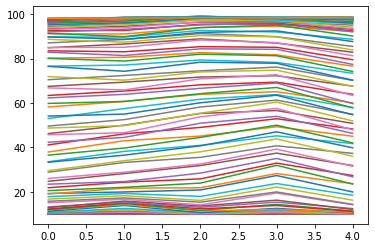

In [30]:
import matplotlib.pyplot as plt

plt.plot(acc_list)
plt.show()

In [31]:
acc_list

[[10.0,
  10.0,
  10.0,
  10.0,
  10.0,
  10.0,
  10.0,
  10.0,
  10.0,
  10.0,
  10.0,
  10.0,
  10.0,
  10.0,
  10.0,
  10.0,
  10.0,
  10.0,
  10.0,
  10.0,
  10.0,
  10.0,
  10.0,
  10.0,
  10.0,
  10.0,
  10.2,
  10.4,
  10.8,
  10.7,
  11.2,
  11.9,
  11.8,
  12.2,
  13.2,
  12.8,
  15.0,
  15.7,
  16.7,
  17.8,
  19.2,
  19.0,
  20.5,
  21.8,
  23.4,
  24.7,
  26.0,
  28.8,
  29.5,
  33.5,
  33.3,
  37.9,
  36.5,
  41.1,
  42.3,
  46.2,
  45.7,
  49.6,
  48.7,
  53.0,
  54.1,
  58.2,
  59.8,
  63.4,
  62.3,
  67.5,
  66.8,
  70.5,
  71.9,
  76.6,
  76.5,
  80.2,
  80.1,
  83.5,
  82.9,
  84.9,
  85.0,
  87.1,
  88.7,
  89.8,
  89.8,
  91.2,
  91.4,
  92.6,
  92.0,
  93.4,
  93.2,
  94.5,
  94.0,
  95.1,
  95.4,
  95.9,
  96.0,
  96.6,
  96.5,
  96.8,
  97.1,
  97.4,
  97.5,
  97.3,
  97.0,
  97.5,
  97.3,
  97.4,
  97.6,
  98.0,
  97.8,
  98.1,
  98.1,
  98.2,
  97.7,
  98.1],
 [10.0,
  10.0,
  10.0,
  10.0,
  10.0,
  10.0,
  10.0,
  10.0,
  10.0,
  10.0,
  10.0,
  10.0,
  10.0,

In [35]:
model.sc1.conv1.weight

Parameter containing:
tensor([[[[ 3.3432e-02,  6.5793e-02,  1.4002e-01,  ...,  2.1923e-01,
            2.3481e-01,  2.2607e-01],
          [ 5.6389e-02, -1.8555e-02,  8.8081e-02,  ...,  1.2100e-01,
            1.8945e-01,  1.2545e-01],
          [-1.8425e-02, -3.1649e-03, -9.9248e-03,  ..., -2.4641e-02,
            5.0960e-02,  1.4391e-02],
          ...,
          [-1.2570e-01, -6.9318e-02, -5.4270e-02,  ...,  7.7431e-02,
            9.7144e-02,  9.4179e-02],
          [-6.4767e-02, -1.1527e-01, -7.1164e-02,  ..., -4.9493e-02,
           -1.0074e-02,  5.7282e-02],
          [-1.6020e-01, -1.8147e-01, -8.9943e-02,  ..., -1.3002e-02,
           -4.2157e-02, -6.5157e-03]],

         [[ 9.9896e-02,  5.5257e-02,  1.1160e-01,  ...,  2.4678e-01,
            2.6183e-01,  2.6050e-01],
          [ 6.6815e-02,  6.0311e-02,  2.7421e-02,  ...,  5.1445e-02,
            1.9910e-01,  1.5020e-01],
          [-5.4155e-02, -2.6448e-02,  1.8471e-02,  ...,  4.4953e-02,
            5.2052e-02,  9.9970e-02]

In [30]:
model.eval()

Net(
  (sc1): SCModule(
    (conv1): Conv2d(3, 6, kernel_size=(9, 9), stride=(9, 9), padding=(4, 4))
    (conv2): Conv2d(3, 6, kernel_size=(3, 3), stride=(3, 3), padding=(1, 1))
    (conv3): Conv2d(3, 6, kernel_size=(1, 1), stride=(1, 1))
  )
  (bn1_1): BatchNorm2d(18, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn1_2): BatchNorm2d(18, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn1_3): BatchNorm2d(18, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (sc2): SCModule(
    (conv1): Conv2d(18, 10, kernel_size=(9, 9), stride=(9, 9), padding=(4, 4))
    (conv2): Conv2d(18, 10, kernel_size=(3, 3), stride=(3, 3), padding=(1, 1))
    (conv3): Conv2d(18, 10, kernel_size=(1, 1), stride=(1, 1))
  )
  (bn2_1): BatchNorm2d(30, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2_2): BatchNorm2d(30, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2_3): BatchNorm2d(30, eps=1e-05, momentum=0.1, affine

In [ ]:
len(trainloader)

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for images in tqdm(testloader):
        c1 = images[0][0].to(device)
        c2 = images[1][0].to(device)
        c3 = images[2][0].to(device)
        c4 = images[3][0].to(device)
        c5 = images[4][0].to(device)
        labels = images[0][1].to(device)
        outputs = model(c1,c2,c3,c4,c5)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        print(total,correct,end='')

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

In [ ]:
c1.size()[0]

In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for images in tqdm(testloader):
        c1 = images[0][0].to(device)
        c2 = images[1][0].to(device)
        c3 = images[2][0].to(device)
        c4 = images[3][0].to(device)
        c5 = images[4][0].to(device)
        labels = images[0][1].to(device)
        outputs = model(c1,c2,c3,c4,c5)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(len(labels)):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (i, 100 * class_correct[i] / class_total[i]))

In [ ]:
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (i, 100 * class_correct[i] / class_total[i]))

In [ ]:
labels

In [ ]:
output.size()

In [ ]:
c6.size()

In [36]:
SIZED_VAL_PATH = 'sized_val'

new_path = []

for i in os.listdir('mnist_sized'):
    #print(i)
    temp = []
    for j in range(1,6):
        temp.append(os.path.join(SIZED_VAL_PATH,str(i),'ds'+str(j)))
    new_path.append(temp)

#new_path

In [37]:
new_path.sort(key=lambda x:int(x[0].split('/')[1]))
new_path

[['sized_val/1/ds1',
  'sized_val/1/ds2',
  'sized_val/1/ds3',
  'sized_val/1/ds4',
  'sized_val/1/ds5'],
 ['sized_val/2/ds1',
  'sized_val/2/ds2',
  'sized_val/2/ds3',
  'sized_val/2/ds4',
  'sized_val/2/ds5'],
 ['sized_val/3/ds1',
  'sized_val/3/ds2',
  'sized_val/3/ds3',
  'sized_val/3/ds4',
  'sized_val/3/ds5'],
 ['sized_val/4/ds1',
  'sized_val/4/ds2',
  'sized_val/4/ds3',
  'sized_val/4/ds4',
  'sized_val/4/ds5'],
 ['sized_val/5/ds1',
  'sized_val/5/ds2',
  'sized_val/5/ds3',
  'sized_val/5/ds4',
  'sized_val/5/ds5'],
 ['sized_val/6/ds1',
  'sized_val/6/ds2',
  'sized_val/6/ds3',
  'sized_val/6/ds4',
  'sized_val/6/ds5'],
 ['sized_val/7/ds1',
  'sized_val/7/ds2',
  'sized_val/7/ds3',
  'sized_val/7/ds4',
  'sized_val/7/ds5'],
 ['sized_val/8/ds1',
  'sized_val/8/ds2',
  'sized_val/8/ds3',
  'sized_val/8/ds4',
  'sized_val/8/ds5'],
 ['sized_val/9/ds1',
  'sized_val/9/ds2',
  'sized_val/9/ds3',
  'sized_val/9/ds4',
  'sized_val/9/ds5'],
 ['sized_val/10/ds1',
  'sized_val/10/ds2',
  

In [38]:
val_gen_arr = []
for i in tqdm(range(len(new_path))):
    transform = transforms.Compose(
        [
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    testMnistDataset = SizedMnistDataset(new_path[i],transform)

    testloader = torch.utils.data.DataLoader(testMnistDataset,
                                              batch_size = 32, 
                                              shuffle=False,
                                            num_workers=8,
                                            pin_memory=True)
    val_gen_arr.append(testloader)

100%|██████████| 112/112 [00:01<00:00, 88.82it/s]


In [39]:
#val_gen_arr

In [40]:
accuracy = []

for testloader in tqdm(val_gen_arr):
    correct = 0
    total = 0
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    with torch.no_grad():
        for images in testloader:
            c1 = images[0][0].to(device)
            c2 = images[1][0].to(device)
            c3 = images[2][0].to(device)
            c4 = images[3][0].to(device)
            c5 = images[4][0].to(device)
            val_labels = images[0][1].to(device)
            outputs = model(c1,c2,c3,c4,c5)
            _, predicted = torch.max(outputs.data, 1)
            c = (predicted == val_labels).squeeze()
            total += val_labels.size(0)
            correct += (predicted == val_labels).sum().item()
            for i in range(len(val_labels)):
                val_label = val_labels[i]
                class_correct[val_label] += c[i].item()
                class_total[val_label] += 1

        for i in range(10):
            if class_total[i]==0:
                print('class_total = 0',class_correct,class_total)
            else:
                print('Accuracy of %5s : %2d %%' % (i, 100 * class_correct[i] / class_total[i]))
            #print(total,correct,end='')

    print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))
    accuracy.append((100 * correct / total))

  1%|          | 1/112 [00:01<01:58,  1.07s/it]

Accuracy of     0 :  0 %
Accuracy of     1 : 100 %
Accuracy of     2 :  0 %
Accuracy of     3 :  0 %
Accuracy of     4 :  0 %
Accuracy of     5 :  0 %
Accuracy of     6 :  0 %
Accuracy of     7 :  0 %
Accuracy of     8 :  0 %
Accuracy of     9 :  0 %
Accuracy of the network on the 10000 test images: 10 %


  2%|▏         | 2/112 [00:02<01:57,  1.06s/it]

Accuracy of     0 :  0 %
Accuracy of     1 : 100 %
Accuracy of     2 :  0 %
Accuracy of     3 :  0 %
Accuracy of     4 :  0 %
Accuracy of     5 :  0 %
Accuracy of     6 :  0 %
Accuracy of     7 :  0 %
Accuracy of     8 :  0 %
Accuracy of     9 :  0 %
Accuracy of the network on the 10000 test images: 10 %


  3%|▎         | 3/112 [00:03<01:54,  1.05s/it]

Accuracy of     0 :  0 %
Accuracy of     1 : 100 %
Accuracy of     2 :  0 %
Accuracy of     3 :  0 %
Accuracy of     4 :  0 %
Accuracy of     5 :  0 %
Accuracy of     6 :  0 %
Accuracy of     7 :  0 %
Accuracy of     8 :  0 %
Accuracy of     9 :  0 %
Accuracy of the network on the 10000 test images: 10 %


  4%|▎         | 4/112 [00:04<01:52,  1.04s/it]

Accuracy of     0 :  0 %
Accuracy of     1 : 100 %
Accuracy of     2 :  0 %
Accuracy of     3 :  0 %
Accuracy of     4 :  0 %
Accuracy of     5 :  0 %
Accuracy of     6 :  0 %
Accuracy of     7 :  0 %
Accuracy of     8 :  0 %
Accuracy of     9 :  0 %
Accuracy of the network on the 10000 test images: 10 %


  4%|▍         | 5/112 [00:05<01:53,  1.06s/it]

Accuracy of     0 :  0 %
Accuracy of     1 : 100 %
Accuracy of     2 :  0 %
Accuracy of     3 :  0 %
Accuracy of     4 :  0 %
Accuracy of     5 :  0 %
Accuracy of     6 :  0 %
Accuracy of     7 :  0 %
Accuracy of     8 :  0 %
Accuracy of     9 :  0 %
Accuracy of the network on the 10000 test images: 10 %


  5%|▌         | 6/112 [00:06<01:52,  1.06s/it]

Accuracy of     0 :  0 %
Accuracy of     1 : 100 %
Accuracy of     2 :  0 %
Accuracy of     3 :  0 %
Accuracy of     4 :  0 %
Accuracy of     5 :  0 %
Accuracy of     6 :  0 %
Accuracy of     7 :  0 %
Accuracy of     8 :  0 %
Accuracy of     9 :  0 %
Accuracy of the network on the 10000 test images: 10 %


  6%|▋         | 7/112 [00:07<01:50,  1.06s/it]

Accuracy of     0 :  0 %
Accuracy of     1 : 100 %
Accuracy of     2 :  0 %
Accuracy of     3 :  0 %
Accuracy of     4 :  0 %
Accuracy of     5 :  0 %
Accuracy of     6 :  0 %
Accuracy of     7 :  0 %
Accuracy of     8 :  0 %
Accuracy of     9 :  0 %
Accuracy of the network on the 10000 test images: 10 %


  7%|▋         | 8/112 [00:08<01:49,  1.06s/it]

Accuracy of     0 :  0 %
Accuracy of     1 : 100 %
Accuracy of     2 :  0 %
Accuracy of     3 :  0 %
Accuracy of     4 :  0 %
Accuracy of     5 :  0 %
Accuracy of     6 :  0 %
Accuracy of     7 :  0 %
Accuracy of     8 :  0 %
Accuracy of     9 :  0 %
Accuracy of the network on the 10000 test images: 10 %


  8%|▊         | 9/112 [00:09<01:49,  1.06s/it]

Accuracy of     0 :  0 %
Accuracy of     1 : 100 %
Accuracy of     2 :  0 %
Accuracy of     3 :  0 %
Accuracy of     4 :  0 %
Accuracy of     5 :  0 %
Accuracy of     6 :  0 %
Accuracy of     7 :  0 %
Accuracy of     8 :  0 %
Accuracy of     9 :  0 %
Accuracy of the network on the 10000 test images: 10 %


  9%|▉         | 10/112 [00:10<01:47,  1.06s/it]

Accuracy of     0 :  0 %
Accuracy of     1 : 100 %
Accuracy of     2 :  0 %
Accuracy of     3 :  0 %
Accuracy of     4 :  0 %
Accuracy of     5 :  0 %
Accuracy of     6 :  0 %
Accuracy of     7 :  0 %
Accuracy of     8 :  0 %
Accuracy of     9 :  0 %
Accuracy of the network on the 10000 test images: 10 %


 10%|▉         | 11/112 [00:11<01:46,  1.06s/it]

Accuracy of     0 :  0 %
Accuracy of     1 : 100 %
Accuracy of     2 :  0 %
Accuracy of     3 :  0 %
Accuracy of     4 :  0 %
Accuracy of     5 :  0 %
Accuracy of     6 :  0 %
Accuracy of     7 :  0 %
Accuracy of     8 :  0 %
Accuracy of     9 :  0 %
Accuracy of the network on the 10000 test images: 10 %


 11%|█         | 12/112 [00:12<01:45,  1.05s/it]

Accuracy of     0 :  0 %
Accuracy of     1 : 100 %
Accuracy of     2 :  0 %
Accuracy of     3 :  0 %
Accuracy of     4 :  0 %
Accuracy of     5 :  0 %
Accuracy of     6 :  0 %
Accuracy of     7 :  0 %
Accuracy of     8 :  0 %
Accuracy of     9 :  0 %
Accuracy of the network on the 10000 test images: 10 %


 12%|█▏        | 13/112 [00:13<01:44,  1.05s/it]

Accuracy of     0 :  0 %
Accuracy of     1 : 100 %
Accuracy of     2 :  0 %
Accuracy of     3 :  0 %
Accuracy of     4 :  0 %
Accuracy of     5 :  0 %
Accuracy of     6 :  0 %
Accuracy of     7 :  0 %
Accuracy of     8 :  0 %
Accuracy of     9 :  0 %
Accuracy of the network on the 10000 test images: 10 %


 12%|█▎        | 14/112 [00:14<01:42,  1.05s/it]

Accuracy of     0 :  0 %
Accuracy of     1 : 100 %
Accuracy of     2 :  0 %
Accuracy of     3 :  0 %
Accuracy of     4 :  0 %
Accuracy of     5 :  0 %
Accuracy of     6 :  0 %
Accuracy of     7 :  0 %
Accuracy of     8 :  0 %
Accuracy of     9 :  0 %
Accuracy of the network on the 10000 test images: 10 %


 13%|█▎        | 15/112 [00:15<01:42,  1.05s/it]

Accuracy of     0 :  0 %
Accuracy of     1 : 100 %
Accuracy of     2 :  0 %
Accuracy of     3 :  0 %
Accuracy of     4 :  0 %
Accuracy of     5 :  0 %
Accuracy of     6 :  0 %
Accuracy of     7 :  0 %
Accuracy of     8 :  0 %
Accuracy of     9 :  0 %
Accuracy of the network on the 10000 test images: 10 %


 14%|█▍        | 16/112 [00:16<01:41,  1.05s/it]

Accuracy of     0 :  0 %
Accuracy of     1 : 100 %
Accuracy of     2 :  0 %
Accuracy of     3 :  0 %
Accuracy of     4 :  0 %
Accuracy of     5 :  0 %
Accuracy of     6 :  0 %
Accuracy of     7 :  0 %
Accuracy of     8 :  0 %
Accuracy of     9 :  0 %
Accuracy of the network on the 10000 test images: 10 %


 15%|█▌        | 17/112 [00:17<01:38,  1.04s/it]

Accuracy of     0 :  0 %
Accuracy of     1 : 100 %
Accuracy of     2 :  0 %
Accuracy of     3 :  0 %
Accuracy of     4 :  0 %
Accuracy of     5 :  0 %
Accuracy of     6 :  0 %
Accuracy of     7 :  0 %
Accuracy of     8 :  0 %
Accuracy of     9 :  0 %
Accuracy of the network on the 10000 test images: 10 %


 16%|█▌        | 18/112 [00:18<01:37,  1.04s/it]

Accuracy of     0 :  0 %
Accuracy of     1 : 100 %
Accuracy of     2 :  0 %
Accuracy of     3 :  0 %
Accuracy of     4 :  0 %
Accuracy of     5 :  0 %
Accuracy of     6 :  0 %
Accuracy of     7 :  0 %
Accuracy of     8 :  0 %
Accuracy of     9 :  0 %
Accuracy of the network on the 10000 test images: 10 %


 17%|█▋        | 19/112 [00:19<01:37,  1.05s/it]

Accuracy of     0 :  0 %
Accuracy of     1 : 100 %
Accuracy of     2 :  0 %
Accuracy of     3 :  0 %
Accuracy of     4 :  0 %
Accuracy of     5 :  0 %
Accuracy of     6 :  0 %
Accuracy of     7 :  0 %
Accuracy of     8 :  0 %
Accuracy of     9 :  0 %
Accuracy of the network on the 10000 test images: 10 %


 18%|█▊        | 20/112 [00:20<01:36,  1.04s/it]

Accuracy of     0 :  0 %
Accuracy of     1 : 100 %
Accuracy of     2 :  0 %
Accuracy of     3 :  0 %
Accuracy of     4 :  0 %
Accuracy of     5 :  0 %
Accuracy of     6 :  0 %
Accuracy of     7 :  0 %
Accuracy of     8 :  0 %
Accuracy of     9 :  0 %
Accuracy of the network on the 10000 test images: 10 %


 19%|█▉        | 21/112 [00:22<01:34,  1.04s/it]

Accuracy of     0 :  0 %
Accuracy of     1 : 100 %
Accuracy of     2 :  0 %
Accuracy of     3 :  0 %
Accuracy of     4 :  0 %
Accuracy of     5 :  0 %
Accuracy of     6 :  0 %
Accuracy of     7 :  0 %
Accuracy of     8 :  0 %
Accuracy of     9 :  0 %
Accuracy of the network on the 10000 test images: 10 %


 20%|█▉        | 22/112 [00:23<01:33,  1.04s/it]

Accuracy of     0 :  0 %
Accuracy of     1 : 100 %
Accuracy of     2 :  0 %
Accuracy of     3 :  0 %
Accuracy of     4 :  0 %
Accuracy of     5 :  0 %
Accuracy of     6 :  0 %
Accuracy of     7 :  0 %
Accuracy of     8 :  0 %
Accuracy of     9 :  0 %
Accuracy of the network on the 10000 test images: 10 %


 21%|██        | 23/112 [00:24<01:32,  1.04s/it]

Accuracy of     0 :  0 %
Accuracy of     1 : 100 %
Accuracy of     2 :  0 %
Accuracy of     3 :  0 %
Accuracy of     4 :  0 %
Accuracy of     5 :  0 %
Accuracy of     6 :  0 %
Accuracy of     7 :  0 %
Accuracy of     8 :  0 %
Accuracy of     9 :  0 %
Accuracy of the network on the 10000 test images: 10 %


 21%|██▏       | 24/112 [00:25<01:31,  1.04s/it]

Accuracy of     0 :  0 %
Accuracy of     1 : 100 %
Accuracy of     2 :  0 %
Accuracy of     3 :  0 %
Accuracy of     4 :  0 %
Accuracy of     5 :  0 %
Accuracy of     6 :  0 %
Accuracy of     7 :  0 %
Accuracy of     8 :  0 %
Accuracy of     9 :  0 %
Accuracy of the network on the 10000 test images: 10 %


 22%|██▏       | 25/112 [00:26<01:29,  1.03s/it]

Accuracy of     0 :  0 %
Accuracy of     1 : 100 %
Accuracy of     2 :  0 %
Accuracy of     3 :  0 %
Accuracy of     4 :  0 %
Accuracy of     5 :  0 %
Accuracy of     6 :  0 %
Accuracy of     7 :  0 %
Accuracy of     8 :  0 %
Accuracy of     9 :  0 %
Accuracy of the network on the 10000 test images: 10 %


 23%|██▎       | 26/112 [00:27<01:29,  1.04s/it]

Accuracy of     0 :  0 %
Accuracy of     1 : 100 %
Accuracy of     2 :  0 %
Accuracy of     3 :  0 %
Accuracy of     4 :  0 %
Accuracy of     5 :  0 %
Accuracy of     6 :  0 %
Accuracy of     7 :  0 %
Accuracy of     8 :  0 %
Accuracy of     9 :  0 %
Accuracy of the network on the 10000 test images: 10 %


 24%|██▍       | 27/112 [00:28<01:28,  1.04s/it]

Accuracy of     0 :  0 %
Accuracy of     1 : 100 %
Accuracy of     2 :  0 %
Accuracy of     3 :  0 %
Accuracy of     4 :  0 %
Accuracy of     5 :  0 %
Accuracy of     6 :  0 %
Accuracy of     7 :  0 %
Accuracy of     8 :  0 %
Accuracy of     9 :  0 %
Accuracy of the network on the 10000 test images: 10 %


 25%|██▌       | 28/112 [00:29<01:28,  1.05s/it]

Accuracy of     0 :  0 %
Accuracy of     1 : 100 %
Accuracy of     2 :  0 %
Accuracy of     3 :  0 %
Accuracy of     4 :  0 %
Accuracy of     5 :  0 %
Accuracy of     6 :  0 %
Accuracy of     7 :  0 %
Accuracy of     8 :  0 %
Accuracy of     9 :  0 %
Accuracy of the network on the 10000 test images: 10 %


 26%|██▌       | 29/112 [00:30<01:27,  1.05s/it]

Accuracy of     0 :  0 %
Accuracy of     1 : 100 %
Accuracy of     2 :  0 %
Accuracy of     3 :  0 %
Accuracy of     4 :  2 %
Accuracy of     5 :  0 %
Accuracy of     6 :  1 %
Accuracy of     7 :  0 %
Accuracy of     8 :  0 %
Accuracy of     9 :  0 %
Accuracy of the network on the 10000 test images: 10 %


 27%|██▋       | 30/112 [00:31<01:26,  1.05s/it]

Accuracy of     0 :  0 %
Accuracy of     1 : 100 %
Accuracy of     2 :  0 %
Accuracy of     3 :  0 %
Accuracy of     4 :  0 %
Accuracy of     5 :  0 %
Accuracy of     6 :  1 %
Accuracy of     7 :  0 %
Accuracy of     8 :  0 %
Accuracy of     9 :  0 %
Accuracy of the network on the 10000 test images: 10 %


 28%|██▊       | 31/112 [00:32<01:25,  1.05s/it]

Accuracy of     0 :  0 %
Accuracy of     1 : 100 %
Accuracy of     2 :  0 %
Accuracy of     3 :  0 %
Accuracy of     4 :  3 %
Accuracy of     5 :  0 %
Accuracy of     6 :  2 %
Accuracy of     7 :  0 %
Accuracy of     8 :  0 %
Accuracy of     9 :  0 %
Accuracy of the network on the 10000 test images: 10 %


 29%|██▊       | 32/112 [00:33<01:24,  1.05s/it]

Accuracy of     0 :  0 %
Accuracy of     1 : 100 %
Accuracy of     2 :  0 %
Accuracy of     3 :  0 %
Accuracy of     4 :  3 %
Accuracy of     5 :  0 %
Accuracy of     6 :  1 %
Accuracy of     7 :  0 %
Accuracy of     8 :  0 %
Accuracy of     9 :  0 %
Accuracy of the network on the 10000 test images: 10 %


 29%|██▉       | 33/112 [00:34<01:23,  1.06s/it]

Accuracy of     0 :  0 %
Accuracy of     1 : 100 %
Accuracy of     2 :  0 %
Accuracy of     3 :  1 %
Accuracy of     4 :  7 %
Accuracy of     5 :  2 %
Accuracy of     6 :  1 %
Accuracy of     7 :  0 %
Accuracy of     8 :  0 %
Accuracy of     9 :  0 %
Accuracy of the network on the 10000 test images: 11 %


 30%|███       | 34/112 [00:35<01:22,  1.06s/it]

Accuracy of     0 :  0 %
Accuracy of     1 : 100 %
Accuracy of     2 :  3 %
Accuracy of     3 :  0 %
Accuracy of     4 :  6 %
Accuracy of     5 :  5 %
Accuracy of     6 :  2 %
Accuracy of     7 :  0 %
Accuracy of     8 :  0 %
Accuracy of     9 :  0 %
Accuracy of the network on the 10000 test images: 11 %


 31%|███▏      | 35/112 [00:36<01:20,  1.05s/it]

Accuracy of     0 :  0 %
Accuracy of     1 : 100 %
Accuracy of     2 :  1 %
Accuracy of     3 :  2 %
Accuracy of     4 : 11 %
Accuracy of     5 :  9 %
Accuracy of     6 :  1 %
Accuracy of     7 :  0 %
Accuracy of     8 :  0 %
Accuracy of     9 :  0 %
Accuracy of the network on the 10000 test images: 12 %


 32%|███▏      | 36/112 [00:37<01:19,  1.05s/it]

Accuracy of     0 :  0 %
Accuracy of     1 : 100 %
Accuracy of     2 :  5 %
Accuracy of     3 :  1 %
Accuracy of     4 : 11 %
Accuracy of     5 :  8 %
Accuracy of     6 :  2 %
Accuracy of     7 :  0 %
Accuracy of     8 :  0 %
Accuracy of     9 :  0 %
Accuracy of the network on the 10000 test images: 12 %


 33%|███▎      | 37/112 [00:38<01:17,  1.04s/it]

Accuracy of     0 :  0 %
Accuracy of     1 : 100 %
Accuracy of     2 :  6 %
Accuracy of     3 :  1 %
Accuracy of     4 : 15 %
Accuracy of     5 : 25 %
Accuracy of     6 :  2 %
Accuracy of     7 :  0 %
Accuracy of     8 :  0 %
Accuracy of     9 :  0 %
Accuracy of the network on the 10000 test images: 14 %


 34%|███▍      | 38/112 [00:39<01:16,  1.04s/it]

Accuracy of     0 :  0 %
Accuracy of     1 : 100 %
Accuracy of     2 :  7 %
Accuracy of     3 :  1 %
Accuracy of     4 : 16 %
Accuracy of     5 : 27 %
Accuracy of     6 :  2 %
Accuracy of     7 :  1 %
Accuracy of     8 :  0 %
Accuracy of     9 :  0 %
Accuracy of the network on the 10000 test images: 15 %


 35%|███▍      | 39/112 [00:40<01:16,  1.05s/it]

Accuracy of     0 :  0 %
Accuracy of     1 : 100 %
Accuracy of     2 :  7 %
Accuracy of     3 :  2 %
Accuracy of     4 : 24 %
Accuracy of     5 : 40 %
Accuracy of     6 :  5 %
Accuracy of     7 :  0 %
Accuracy of     8 :  0 %
Accuracy of     9 :  0 %
Accuracy of the network on the 10000 test images: 17 %


 36%|███▌      | 40/112 [00:41<01:15,  1.05s/it]

Accuracy of     0 :  0 %
Accuracy of     1 : 100 %
Accuracy of     2 : 12 %
Accuracy of     3 :  4 %
Accuracy of     4 : 19 %
Accuracy of     5 : 34 %
Accuracy of     6 :  3 %
Accuracy of     7 :  1 %
Accuracy of     8 :  0 %
Accuracy of     9 :  0 %
Accuracy of the network on the 10000 test images: 17 %


 37%|███▋      | 41/112 [00:43<01:14,  1.05s/it]

Accuracy of     0 :  0 %
Accuracy of     1 : 100 %
Accuracy of     2 : 12 %
Accuracy of     3 :  4 %
Accuracy of     4 : 30 %
Accuracy of     5 : 49 %
Accuracy of     6 :  7 %
Accuracy of     7 :  0 %
Accuracy of     8 :  1 %
Accuracy of     9 :  0 %
Accuracy of the network on the 10000 test images: 20 %


 38%|███▊      | 42/112 [00:44<01:14,  1.06s/it]

Accuracy of     0 :  0 %
Accuracy of     1 : 100 %
Accuracy of     2 : 20 %
Accuracy of     3 :  9 %
Accuracy of     4 : 28 %
Accuracy of     5 : 51 %
Accuracy of     6 :  7 %
Accuracy of     7 :  1 %
Accuracy of     8 :  0 %
Accuracy of     9 :  0 %
Accuracy of the network on the 10000 test images: 21 %


 38%|███▊      | 43/112 [00:45<01:12,  1.06s/it]

Accuracy of     0 :  0 %
Accuracy of     1 : 100 %
Accuracy of     2 : 14 %
Accuracy of     3 :  4 %
Accuracy of     4 : 34 %
Accuracy of     5 : 63 %
Accuracy of     6 : 10 %
Accuracy of     7 :  2 %
Accuracy of     8 :  1 %
Accuracy of     9 :  1 %
Accuracy of the network on the 10000 test images: 22 %


 39%|███▉      | 44/112 [00:46<01:11,  1.05s/it]

Accuracy of     0 :  1 %
Accuracy of     1 : 100 %
Accuracy of     2 : 22 %
Accuracy of     3 :  6 %
Accuracy of     4 : 45 %
Accuracy of     5 : 64 %
Accuracy of     6 : 13 %
Accuracy of     7 :  2 %
Accuracy of     8 :  0 %
Accuracy of     9 :  2 %
Accuracy of the network on the 10000 test images: 25 %


 40%|████      | 45/112 [00:47<01:10,  1.05s/it]

Accuracy of     0 :  4 %
Accuracy of     1 : 100 %
Accuracy of     2 : 24 %
Accuracy of     3 :  5 %
Accuracy of     4 : 43 %
Accuracy of     5 : 68 %
Accuracy of     6 :  8 %
Accuracy of     7 :  2 %
Accuracy of     8 :  0 %
Accuracy of     9 :  3 %
Accuracy of the network on the 10000 test images: 25 %


 41%|████      | 46/112 [00:48<01:09,  1.06s/it]

Accuracy of     0 :  4 %
Accuracy of     1 : 100 %
Accuracy of     2 : 33 %
Accuracy of     3 :  8 %
Accuracy of     4 : 47 %
Accuracy of     5 : 75 %
Accuracy of     6 : 17 %
Accuracy of     7 :  4 %
Accuracy of     8 :  0 %
Accuracy of     9 :  2 %
Accuracy of the network on the 10000 test images: 29 %


 42%|████▏     | 47/112 [00:49<01:08,  1.05s/it]

Accuracy of     0 :  2 %
Accuracy of     1 : 100 %
Accuracy of     2 : 35 %
Accuracy of     3 :  5 %
Accuracy of     4 : 51 %
Accuracy of     5 : 69 %
Accuracy of     6 : 20 %
Accuracy of     7 :  8 %
Accuracy of     8 :  1 %
Accuracy of     9 :  8 %
Accuracy of the network on the 10000 test images: 29 %


 43%|████▎     | 48/112 [00:50<01:06,  1.04s/it]

Accuracy of     0 :  8 %
Accuracy of     1 : 100 %
Accuracy of     2 : 44 %
Accuracy of     3 :  9 %
Accuracy of     4 : 53 %
Accuracy of     5 : 72 %
Accuracy of     6 : 24 %
Accuracy of     7 :  8 %
Accuracy of     8 :  3 %
Accuracy of     9 :  8 %
Accuracy of the network on the 10000 test images: 32 %


 44%|████▍     | 49/112 [00:51<01:06,  1.05s/it]

Accuracy of     0 :  6 %
Accuracy of     1 : 100 %
Accuracy of     2 : 50 %
Accuracy of     3 :  8 %
Accuracy of     4 : 57 %
Accuracy of     5 : 74 %
Accuracy of     6 : 28 %
Accuracy of     7 :  9 %
Accuracy of     8 :  2 %
Accuracy of     9 : 11 %
Accuracy of the network on the 10000 test images: 34 %


 45%|████▍     | 50/112 [00:52<01:05,  1.05s/it]

Accuracy of     0 : 10 %
Accuracy of     1 : 100 %
Accuracy of     2 : 59 %
Accuracy of     3 : 13 %
Accuracy of     4 : 57 %
Accuracy of     5 : 75 %
Accuracy of     6 : 35 %
Accuracy of     7 : 10 %
Accuracy of     8 :  5 %
Accuracy of     9 :  9 %
Accuracy of the network on the 10000 test images: 37 %


 46%|████▌     | 51/112 [00:53<01:03,  1.05s/it]

Accuracy of     0 : 12 %
Accuracy of     1 : 100 %
Accuracy of     2 : 52 %
Accuracy of     3 : 11 %
Accuracy of     4 : 61 %
Accuracy of     5 : 74 %
Accuracy of     6 : 36 %
Accuracy of     7 : 14 %
Accuracy of     8 :  6 %
Accuracy of     9 : 16 %
Accuracy of the network on the 10000 test images: 38 %


 46%|████▋     | 52/112 [00:54<01:03,  1.05s/it]

Accuracy of     0 : 13 %
Accuracy of     1 : 100 %
Accuracy of     2 : 67 %
Accuracy of     3 : 14 %
Accuracy of     4 : 61 %
Accuracy of     5 : 84 %
Accuracy of     6 : 44 %
Accuracy of     7 : 10 %
Accuracy of     8 :  9 %
Accuracy of     9 : 17 %
Accuracy of the network on the 10000 test images: 41 %


 47%|████▋     | 53/112 [00:55<01:01,  1.04s/it]

Accuracy of     0 : 19 %
Accuracy of     1 : 100 %
Accuracy of     2 : 69 %
Accuracy of     3 : 19 %
Accuracy of     4 : 64 %
Accuracy of     5 : 77 %
Accuracy of     6 : 45 %
Accuracy of     7 : 16 %
Accuracy of     8 : 13 %
Accuracy of     9 : 18 %
Accuracy of the network on the 10000 test images: 44 %


 48%|████▊     | 54/112 [00:56<01:00,  1.04s/it]

Accuracy of     0 : 15 %
Accuracy of     1 : 100 %
Accuracy of     2 : 75 %
Accuracy of     3 : 30 %
Accuracy of     4 : 65 %
Accuracy of     5 : 83 %
Accuracy of     6 : 55 %
Accuracy of     7 : 21 %
Accuracy of     8 : 13 %
Accuracy of     9 : 20 %
Accuracy of the network on the 10000 test images: 47 %


 49%|████▉     | 55/112 [00:57<00:59,  1.05s/it]

Accuracy of     0 : 23 %
Accuracy of     1 : 100 %
Accuracy of     2 : 70 %
Accuracy of     3 : 31 %
Accuracy of     4 : 70 %
Accuracy of     5 : 75 %
Accuracy of     6 : 56 %
Accuracy of     7 : 23 %
Accuracy of     8 : 20 %
Accuracy of     9 : 27 %
Accuracy of the network on the 10000 test images: 49 %


 50%|█████     | 56/112 [00:58<00:58,  1.04s/it]

Accuracy of     0 : 22 %
Accuracy of     1 : 100 %
Accuracy of     2 : 78 %
Accuracy of     3 : 39 %
Accuracy of     4 : 73 %
Accuracy of     5 : 84 %
Accuracy of     6 : 62 %
Accuracy of     7 : 27 %
Accuracy of     8 : 20 %
Accuracy of     9 : 24 %
Accuracy of the network on the 10000 test images: 52 %


 51%|█████     | 57/112 [00:59<00:56,  1.03s/it]

Accuracy of     0 : 18 %
Accuracy of     1 : 100 %
Accuracy of     2 : 73 %
Accuracy of     3 : 38 %
Accuracy of     4 : 76 %
Accuracy of     5 : 71 %
Accuracy of     6 : 58 %
Accuracy of     7 : 26 %
Accuracy of     8 : 23 %
Accuracy of     9 : 37 %
Accuracy of the network on the 10000 test images: 52 %


 52%|█████▏    | 58/112 [01:00<00:55,  1.03s/it]

Accuracy of     0 : 27 %
Accuracy of     1 : 100 %
Accuracy of     2 : 76 %
Accuracy of     3 : 43 %
Accuracy of     4 : 76 %
Accuracy of     5 : 81 %
Accuracy of     6 : 68 %
Accuracy of     7 : 31 %
Accuracy of     8 : 30 %
Accuracy of     9 : 46 %
Accuracy of the network on the 10000 test images: 57 %


 53%|█████▎    | 59/112 [01:01<00:55,  1.04s/it]

Accuracy of     0 : 23 %
Accuracy of     1 : 100 %
Accuracy of     2 : 72 %
Accuracy of     3 : 44 %
Accuracy of     4 : 81 %
Accuracy of     5 : 73 %
Accuracy of     6 : 62 %
Accuracy of     7 : 28 %
Accuracy of     8 : 24 %
Accuracy of     9 : 51 %
Accuracy of the network on the 10000 test images: 55 %


 54%|█████▎    | 60/112 [01:02<00:53,  1.03s/it]

Accuracy of     0 : 29 %
Accuracy of     1 : 100 %
Accuracy of     2 : 78 %
Accuracy of     3 : 54 %
Accuracy of     4 : 79 %
Accuracy of     5 : 86 %
Accuracy of     6 : 74 %
Accuracy of     7 : 33 %
Accuracy of     8 : 32 %
Accuracy of     9 : 56 %
Accuracy of the network on the 10000 test images: 62 %


 54%|█████▍    | 61/112 [01:03<00:52,  1.03s/it]

Accuracy of     0 : 25 %
Accuracy of     1 : 100 %
Accuracy of     2 : 76 %
Accuracy of     3 : 53 %
Accuracy of     4 : 84 %
Accuracy of     5 : 78 %
Accuracy of     6 : 71 %
Accuracy of     7 : 37 %
Accuracy of     8 : 27 %
Accuracy of     9 : 62 %
Accuracy of the network on the 10000 test images: 61 %


 55%|█████▌    | 62/112 [01:04<00:51,  1.04s/it]

Accuracy of     0 : 32 %
Accuracy of     1 : 100 %
Accuracy of     2 : 78 %
Accuracy of     3 : 59 %
Accuracy of     4 : 86 %
Accuracy of     5 : 89 %
Accuracy of     6 : 76 %
Accuracy of     7 : 38 %
Accuracy of     8 : 35 %
Accuracy of     9 : 65 %
Accuracy of the network on the 10000 test images: 65 %


 56%|█████▋    | 63/112 [01:05<00:50,  1.04s/it]

Accuracy of     0 : 31 %
Accuracy of     1 : 100 %
Accuracy of     2 : 76 %
Accuracy of     3 : 58 %
Accuracy of     4 : 85 %
Accuracy of     5 : 84 %
Accuracy of     6 : 73 %
Accuracy of     7 : 42 %
Accuracy of     8 : 28 %
Accuracy of     9 : 72 %
Accuracy of the network on the 10000 test images: 64 %


 57%|█████▋    | 64/112 [01:07<00:50,  1.05s/it]

Accuracy of     0 : 39 %
Accuracy of     1 : 100 %
Accuracy of     2 : 81 %
Accuracy of     3 : 64 %
Accuracy of     4 : 86 %
Accuracy of     5 : 88 %
Accuracy of     6 : 78 %
Accuracy of     7 : 44 %
Accuracy of     8 : 46 %
Accuracy of     9 : 71 %
Accuracy of the network on the 10000 test images: 69 %


 58%|█████▊    | 65/112 [01:08<00:49,  1.05s/it]

Accuracy of     0 : 36 %
Accuracy of     1 : 100 %
Accuracy of     2 : 77 %
Accuracy of     3 : 67 %
Accuracy of     4 : 89 %
Accuracy of     5 : 86 %
Accuracy of     6 : 74 %
Accuracy of     7 : 46 %
Accuracy of     8 : 40 %
Accuracy of     9 : 74 %
Accuracy of the network on the 10000 test images: 68 %


 59%|█████▉    | 66/112 [01:09<00:48,  1.05s/it]

Accuracy of     0 : 49 %
Accuracy of     1 : 100 %
Accuracy of     2 : 82 %
Accuracy of     3 : 73 %
Accuracy of     4 : 89 %
Accuracy of     5 : 86 %
Accuracy of     6 : 82 %
Accuracy of     7 : 49 %
Accuracy of     8 : 52 %
Accuracy of     9 : 75 %
Accuracy of the network on the 10000 test images: 73 %


 60%|█████▉    | 67/112 [01:10<00:47,  1.05s/it]

Accuracy of     0 : 42 %
Accuracy of     1 : 100 %
Accuracy of     2 : 77 %
Accuracy of     3 : 72 %
Accuracy of     4 : 88 %
Accuracy of     5 : 86 %
Accuracy of     6 : 78 %
Accuracy of     7 : 45 %
Accuracy of     8 : 49 %
Accuracy of     9 : 81 %
Accuracy of the network on the 10000 test images: 71 %


 61%|██████    | 68/112 [01:11<00:46,  1.05s/it]

Accuracy of     0 : 55 %
Accuracy of     1 : 100 %
Accuracy of     2 : 81 %
Accuracy of     3 : 75 %
Accuracy of     4 : 90 %
Accuracy of     5 : 89 %
Accuracy of     6 : 85 %
Accuracy of     7 : 54 %
Accuracy of     8 : 56 %
Accuracy of     9 : 73 %
Accuracy of the network on the 10000 test images: 75 %


 62%|██████▏   | 69/112 [01:12<00:44,  1.04s/it]

Accuracy of     0 : 51 %
Accuracy of     1 : 99 %
Accuracy of     2 : 84 %
Accuracy of     3 : 74 %
Accuracy of     4 : 92 %
Accuracy of     5 : 89 %
Accuracy of     6 : 86 %
Accuracy of     7 : 47 %
Accuracy of     8 : 57 %
Accuracy of     9 : 88 %
Accuracy of the network on the 10000 test images: 76 %


 62%|██████▎   | 70/112 [01:13<00:43,  1.04s/it]

Accuracy of     0 : 60 %
Accuracy of     1 : 99 %
Accuracy of     2 : 88 %
Accuracy of     3 : 79 %
Accuracy of     4 : 91 %
Accuracy of     5 : 89 %
Accuracy of     6 : 89 %
Accuracy of     7 : 58 %
Accuracy of     8 : 62 %
Accuracy of     9 : 85 %
Accuracy of the network on the 10000 test images: 80 %


 63%|██████▎   | 71/112 [01:14<00:42,  1.04s/it]

Accuracy of     0 : 56 %
Accuracy of     1 : 99 %
Accuracy of     2 : 87 %
Accuracy of     3 : 78 %
Accuracy of     4 : 93 %
Accuracy of     5 : 91 %
Accuracy of     6 : 88 %
Accuracy of     7 : 50 %
Accuracy of     8 : 63 %
Accuracy of     9 : 89 %
Accuracy of the network on the 10000 test images: 79 %


 64%|██████▍   | 72/112 [01:15<00:41,  1.05s/it]

Accuracy of     0 : 66 %
Accuracy of     1 : 99 %
Accuracy of     2 : 90 %
Accuracy of     3 : 83 %
Accuracy of     4 : 94 %
Accuracy of     5 : 91 %
Accuracy of     6 : 91 %
Accuracy of     7 : 57 %
Accuracy of     8 : 68 %
Accuracy of     9 : 86 %
Accuracy of the network on the 10000 test images: 82 %


 65%|██████▌   | 73/112 [01:16<00:41,  1.06s/it]

Accuracy of     0 : 64 %
Accuracy of     1 : 99 %
Accuracy of     2 : 89 %
Accuracy of     3 : 82 %
Accuracy of     4 : 94 %
Accuracy of     5 : 94 %
Accuracy of     6 : 91 %
Accuracy of     7 : 59 %
Accuracy of     8 : 65 %
Accuracy of     9 : 89 %
Accuracy of the network on the 10000 test images: 82 %


 66%|██████▌   | 74/112 [01:17<00:40,  1.06s/it]

Accuracy of     0 : 80 %
Accuracy of     1 : 100 %
Accuracy of     2 : 91 %
Accuracy of     3 : 86 %
Accuracy of     4 : 96 %
Accuracy of     5 : 95 %
Accuracy of     6 : 90 %
Accuracy of     7 : 60 %
Accuracy of     8 : 76 %
Accuracy of     9 : 88 %
Accuracy of the network on the 10000 test images: 86 %


 67%|██████▋   | 75/112 [01:18<00:38,  1.05s/it]

Accuracy of     0 : 76 %
Accuracy of     1 : 100 %
Accuracy of     2 : 92 %
Accuracy of     3 : 85 %
Accuracy of     4 : 96 %
Accuracy of     5 : 93 %
Accuracy of     6 : 92 %
Accuracy of     7 : 57 %
Accuracy of     8 : 77 %
Accuracy of     9 : 90 %
Accuracy of the network on the 10000 test images: 85 %


 68%|██████▊   | 76/112 [01:19<00:37,  1.05s/it]

Accuracy of     0 : 86 %
Accuracy of     1 : 99 %
Accuracy of     2 : 94 %
Accuracy of     3 : 89 %
Accuracy of     4 : 96 %
Accuracy of     5 : 93 %
Accuracy of     6 : 88 %
Accuracy of     7 : 69 %
Accuracy of     8 : 84 %
Accuracy of     9 : 90 %
Accuracy of the network on the 10000 test images: 88 %


 69%|██████▉   | 77/112 [01:20<00:36,  1.05s/it]

Accuracy of     0 : 82 %
Accuracy of     1 : 100 %
Accuracy of     2 : 95 %
Accuracy of     3 : 91 %
Accuracy of     4 : 96 %
Accuracy of     5 : 93 %
Accuracy of     6 : 89 %
Accuracy of     7 : 64 %
Accuracy of     8 : 82 %
Accuracy of     9 : 91 %
Accuracy of the network on the 10000 test images: 88 %


 70%|██████▉   | 78/112 [01:21<00:35,  1.05s/it]

Accuracy of     0 : 89 %
Accuracy of     1 : 99 %
Accuracy of     2 : 98 %
Accuracy of     3 : 91 %
Accuracy of     4 : 97 %
Accuracy of     5 : 93 %
Accuracy of     6 : 93 %
Accuracy of     7 : 75 %
Accuracy of     8 : 87 %
Accuracy of     9 : 90 %
Accuracy of the network on the 10000 test images: 91 %


 71%|███████   | 79/112 [01:22<00:34,  1.04s/it]

Accuracy of     0 : 86 %
Accuracy of     1 : 100 %
Accuracy of     2 : 97 %
Accuracy of     3 : 93 %
Accuracy of     4 : 97 %
Accuracy of     5 : 94 %
Accuracy of     6 : 92 %
Accuracy of     7 : 71 %
Accuracy of     8 : 86 %
Accuracy of     9 : 93 %
Accuracy of the network on the 10000 test images: 90 %


 71%|███████▏  | 80/112 [01:23<00:33,  1.04s/it]

Accuracy of     0 : 87 %
Accuracy of     1 : 100 %
Accuracy of     2 : 98 %
Accuracy of     3 : 91 %
Accuracy of     4 : 98 %
Accuracy of     5 : 95 %
Accuracy of     6 : 94 %
Accuracy of     7 : 80 %
Accuracy of     8 : 88 %
Accuracy of     9 : 90 %
Accuracy of the network on the 10000 test images: 92 %


 72%|███████▏  | 81/112 [01:24<00:32,  1.05s/it]

Accuracy of     0 : 80 %
Accuracy of     1 : 100 %
Accuracy of     2 : 98 %
Accuracy of     3 : 93 %
Accuracy of     4 : 97 %
Accuracy of     5 : 95 %
Accuracy of     6 : 93 %
Accuracy of     7 : 77 %
Accuracy of     8 : 87 %
Accuracy of     9 : 94 %
Accuracy of the network on the 10000 test images: 91 %


 73%|███████▎  | 82/112 [01:25<00:31,  1.05s/it]

Accuracy of     0 : 88 %
Accuracy of     1 : 100 %
Accuracy of     2 : 98 %
Accuracy of     3 : 93 %
Accuracy of     4 : 98 %
Accuracy of     5 : 95 %
Accuracy of     6 : 95 %
Accuracy of     7 : 86 %
Accuracy of     8 : 90 %
Accuracy of     9 : 90 %
Accuracy of the network on the 10000 test images: 93 %


 74%|███████▍  | 83/112 [01:26<00:30,  1.05s/it]

Accuracy of     0 : 84 %
Accuracy of     1 : 100 %
Accuracy of     2 : 98 %
Accuracy of     3 : 93 %
Accuracy of     4 : 97 %
Accuracy of     5 : 95 %
Accuracy of     6 : 94 %
Accuracy of     7 : 85 %
Accuracy of     8 : 89 %
Accuracy of     9 : 93 %
Accuracy of the network on the 10000 test images: 92 %


 75%|███████▌  | 84/112 [01:27<00:29,  1.05s/it]

Accuracy of     0 : 90 %
Accuracy of     1 : 100 %
Accuracy of     2 : 98 %
Accuracy of     3 : 93 %
Accuracy of     4 : 98 %
Accuracy of     5 : 95 %
Accuracy of     6 : 97 %
Accuracy of     7 : 90 %
Accuracy of     8 : 93 %
Accuracy of     9 : 91 %
Accuracy of the network on the 10000 test images: 94 %


 76%|███████▌  | 85/112 [01:29<00:28,  1.05s/it]

Accuracy of     0 : 86 %
Accuracy of     1 : 100 %
Accuracy of     2 : 98 %
Accuracy of     3 : 94 %
Accuracy of     4 : 97 %
Accuracy of     5 : 95 %
Accuracy of     6 : 96 %
Accuracy of     7 : 88 %
Accuracy of     8 : 92 %
Accuracy of     9 : 91 %
Accuracy of the network on the 10000 test images: 93 %


 77%|███████▋  | 86/112 [01:30<00:27,  1.04s/it]

Accuracy of     0 : 94 %
Accuracy of     1 : 100 %
Accuracy of     2 : 99 %
Accuracy of     3 : 94 %
Accuracy of     4 : 99 %
Accuracy of     5 : 97 %
Accuracy of     6 : 96 %
Accuracy of     7 : 92 %
Accuracy of     8 : 93 %
Accuracy of     9 : 91 %
Accuracy of the network on the 10000 test images: 95 %


 78%|███████▊  | 87/112 [01:31<00:26,  1.04s/it]

Accuracy of     0 : 93 %
Accuracy of     1 : 100 %
Accuracy of     2 : 98 %
Accuracy of     3 : 95 %
Accuracy of     4 : 98 %
Accuracy of     5 : 97 %
Accuracy of     6 : 97 %
Accuracy of     7 : 92 %
Accuracy of     8 : 94 %
Accuracy of     9 : 91 %
Accuracy of the network on the 10000 test images: 95 %


 79%|███████▊  | 88/112 [01:32<00:25,  1.05s/it]

Accuracy of     0 : 95 %
Accuracy of     1 : 100 %
Accuracy of     2 : 99 %
Accuracy of     3 : 97 %
Accuracy of     4 : 99 %
Accuracy of     5 : 96 %
Accuracy of     6 : 96 %
Accuracy of     7 : 94 %
Accuracy of     8 : 96 %
Accuracy of     9 : 91 %
Accuracy of the network on the 10000 test images: 96 %


 79%|███████▉  | 89/112 [01:33<00:24,  1.05s/it]

Accuracy of     0 : 93 %
Accuracy of     1 : 100 %
Accuracy of     2 : 98 %
Accuracy of     3 : 95 %
Accuracy of     4 : 99 %
Accuracy of     5 : 97 %
Accuracy of     6 : 97 %
Accuracy of     7 : 95 %
Accuracy of     8 : 95 %
Accuracy of     9 : 92 %
Accuracy of the network on the 10000 test images: 96 %


 80%|████████  | 90/112 [01:34<00:23,  1.05s/it]

Accuracy of     0 : 99 %
Accuracy of     1 : 100 %
Accuracy of     2 : 98 %
Accuracy of     3 : 96 %
Accuracy of     4 : 99 %
Accuracy of     5 : 97 %
Accuracy of     6 : 98 %
Accuracy of     7 : 95 %
Accuracy of     8 : 96 %
Accuracy of     9 : 93 %
Accuracy of the network on the 10000 test images: 97 %


 81%|████████▏ | 91/112 [01:35<00:21,  1.04s/it]

Accuracy of     0 : 92 %
Accuracy of     1 : 100 %
Accuracy of     2 : 99 %
Accuracy of     3 : 97 %
Accuracy of     4 : 99 %
Accuracy of     5 : 97 %
Accuracy of     6 : 99 %
Accuracy of     7 : 96 %
Accuracy of     8 : 95 %
Accuracy of     9 : 93 %
Accuracy of the network on the 10000 test images: 96 %


 82%|████████▏ | 92/112 [01:36<00:20,  1.04s/it]

Accuracy of     0 : 100 %
Accuracy of     1 : 100 %
Accuracy of     2 : 97 %
Accuracy of     3 : 98 %
Accuracy of     4 : 99 %
Accuracy of     5 : 98 %
Accuracy of     6 : 99 %
Accuracy of     7 : 98 %
Accuracy of     8 : 96 %
Accuracy of     9 : 95 %
Accuracy of the network on the 10000 test images: 98 %


 83%|████████▎ | 93/112 [01:37<00:19,  1.04s/it]

Accuracy of     0 : 94 %
Accuracy of     1 : 100 %
Accuracy of     2 : 98 %
Accuracy of     3 : 99 %
Accuracy of     4 : 99 %
Accuracy of     5 : 99 %
Accuracy of     6 : 100 %
Accuracy of     7 : 97 %
Accuracy of     8 : 97 %
Accuracy of     9 : 93 %
Accuracy of the network on the 10000 test images: 97 %


 84%|████████▍ | 94/112 [01:38<00:18,  1.04s/it]

Accuracy of     0 : 99 %
Accuracy of     1 : 100 %
Accuracy of     2 : 97 %
Accuracy of     3 : 99 %
Accuracy of     4 : 100 %
Accuracy of     5 : 100 %
Accuracy of     6 : 99 %
Accuracy of     7 : 97 %
Accuracy of     8 : 97 %
Accuracy of     9 : 95 %
Accuracy of the network on the 10000 test images: 98 %


 85%|████████▍ | 95/112 [01:39<00:17,  1.04s/it]

Accuracy of     0 : 97 %
Accuracy of     1 : 100 %
Accuracy of     2 : 99 %
Accuracy of     3 : 99 %
Accuracy of     4 : 99 %
Accuracy of     5 : 100 %
Accuracy of     6 : 100 %
Accuracy of     7 : 97 %
Accuracy of     8 : 98 %
Accuracy of     9 : 93 %
Accuracy of the network on the 10000 test images: 98 %


 86%|████████▌ | 96/112 [01:40<00:16,  1.04s/it]

Accuracy of     0 : 99 %
Accuracy of     1 : 100 %
Accuracy of     2 : 98 %
Accuracy of     3 : 99 %
Accuracy of     4 : 100 %
Accuracy of     5 : 99 %
Accuracy of     6 : 100 %
Accuracy of     7 : 97 %
Accuracy of     8 : 97 %
Accuracy of     9 : 95 %
Accuracy of the network on the 10000 test images: 98 %


 87%|████████▋ | 97/112 [01:41<00:15,  1.04s/it]

Accuracy of     0 : 98 %
Accuracy of     1 : 100 %
Accuracy of     2 : 99 %
Accuracy of     3 : 99 %
Accuracy of     4 : 99 %
Accuracy of     5 : 98 %
Accuracy of     6 : 100 %
Accuracy of     7 : 100 %
Accuracy of     8 : 97 %
Accuracy of     9 : 94 %
Accuracy of the network on the 10000 test images: 98 %


 88%|████████▊ | 98/112 [01:42<00:14,  1.05s/it]

Accuracy of     0 : 99 %
Accuracy of     1 : 100 %
Accuracy of     2 : 98 %
Accuracy of     3 : 99 %
Accuracy of     4 : 100 %
Accuracy of     5 : 99 %
Accuracy of     6 : 100 %
Accuracy of     7 : 99 %
Accuracy of     8 : 98 %
Accuracy of     9 : 95 %
Accuracy of the network on the 10000 test images: 98 %


 88%|████████▊ | 99/112 [01:43<00:13,  1.05s/it]

Accuracy of     0 : 98 %
Accuracy of     1 : 100 %
Accuracy of     2 : 99 %
Accuracy of     3 : 99 %
Accuracy of     4 : 100 %
Accuracy of     5 : 99 %
Accuracy of     6 : 100 %
Accuracy of     7 : 98 %
Accuracy of     8 : 97 %
Accuracy of     9 : 93 %
Accuracy of the network on the 10000 test images: 98 %


 89%|████████▉ | 100/112 [01:44<00:12,  1.05s/it]

Accuracy of     0 : 99 %
Accuracy of     1 : 100 %
Accuracy of     2 : 99 %
Accuracy of     3 : 99 %
Accuracy of     4 : 100 %
Accuracy of     5 : 98 %
Accuracy of     6 : 100 %
Accuracy of     7 : 99 %
Accuracy of     8 : 98 %
Accuracy of     9 : 95 %
Accuracy of the network on the 10000 test images: 98 %


 90%|█████████ | 101/112 [01:45<00:11,  1.04s/it]

Accuracy of     0 : 99 %
Accuracy of     1 : 100 %
Accuracy of     2 : 99 %
Accuracy of     3 : 99 %
Accuracy of     4 : 100 %
Accuracy of     5 : 99 %
Accuracy of     6 : 100 %
Accuracy of     7 : 98 %
Accuracy of     8 : 98 %
Accuracy of     9 : 94 %
Accuracy of the network on the 10000 test images: 98 %


 91%|█████████ | 102/112 [01:46<00:10,  1.06s/it]

Accuracy of     0 : 99 %
Accuracy of     1 : 100 %
Accuracy of     2 : 99 %
Accuracy of     3 : 99 %
Accuracy of     4 : 100 %
Accuracy of     5 : 99 %
Accuracy of     6 : 100 %
Accuracy of     7 : 99 %
Accuracy of     8 : 98 %
Accuracy of     9 : 94 %
Accuracy of the network on the 10000 test images: 98 %


 92%|█████████▏| 103/112 [01:47<00:09,  1.05s/it]

Accuracy of     0 : 99 %
Accuracy of     1 : 100 %
Accuracy of     2 : 99 %
Accuracy of     3 : 99 %
Accuracy of     4 : 100 %
Accuracy of     5 : 99 %
Accuracy of     6 : 100 %
Accuracy of     7 : 98 %
Accuracy of     8 : 98 %
Accuracy of     9 : 95 %
Accuracy of the network on the 10000 test images: 98 %


 93%|█████████▎| 104/112 [01:48<00:08,  1.05s/it]

Accuracy of     0 : 99 %
Accuracy of     1 : 100 %
Accuracy of     2 : 99 %
Accuracy of     3 : 99 %
Accuracy of     4 : 100 %
Accuracy of     5 : 99 %
Accuracy of     6 : 100 %
Accuracy of     7 : 99 %
Accuracy of     8 : 98 %
Accuracy of     9 : 95 %
Accuracy of the network on the 10000 test images: 98 %


 94%|█████████▍| 105/112 [01:49<00:07,  1.04s/it]

Accuracy of     0 : 99 %
Accuracy of     1 : 100 %
Accuracy of     2 : 99 %
Accuracy of     3 : 99 %
Accuracy of     4 : 100 %
Accuracy of     5 : 99 %
Accuracy of     6 : 99 %
Accuracy of     7 : 99 %
Accuracy of     8 : 98 %
Accuracy of     9 : 94 %
Accuracy of the network on the 10000 test images: 98 %


 95%|█████████▍| 106/112 [01:50<00:06,  1.05s/it]

Accuracy of     0 : 99 %
Accuracy of     1 : 100 %
Accuracy of     2 : 99 %
Accuracy of     3 : 99 %
Accuracy of     4 : 100 %
Accuracy of     5 : 99 %
Accuracy of     6 : 100 %
Accuracy of     7 : 99 %
Accuracy of     8 : 98 %
Accuracy of     9 : 95 %
Accuracy of the network on the 10000 test images: 98 %


 96%|█████████▌| 107/112 [01:52<00:05,  1.05s/it]

Accuracy of     0 : 99 %
Accuracy of     1 : 100 %
Accuracy of     2 : 99 %
Accuracy of     3 : 99 %
Accuracy of     4 : 100 %
Accuracy of     5 : 100 %
Accuracy of     6 : 99 %
Accuracy of     7 : 99 %
Accuracy of     8 : 98 %
Accuracy of     9 : 95 %
Accuracy of the network on the 10000 test images: 98 %


 96%|█████████▋| 108/112 [01:53<00:04,  1.05s/it]

Accuracy of     0 : 99 %
Accuracy of     1 : 100 %
Accuracy of     2 : 99 %
Accuracy of     3 : 99 %
Accuracy of     4 : 100 %
Accuracy of     5 : 100 %
Accuracy of     6 : 99 %
Accuracy of     7 : 99 %
Accuracy of     8 : 98 %
Accuracy of     9 : 95 %
Accuracy of the network on the 10000 test images: 98 %


 97%|█████████▋| 109/112 [01:54<00:03,  1.06s/it]

Accuracy of     0 : 99 %
Accuracy of     1 : 100 %
Accuracy of     2 : 99 %
Accuracy of     3 : 99 %
Accuracy of     4 : 100 %
Accuracy of     5 : 100 %
Accuracy of     6 : 99 %
Accuracy of     7 : 99 %
Accuracy of     8 : 98 %
Accuracy of     9 : 96 %
Accuracy of the network on the 10000 test images: 98 %


 98%|█████████▊| 110/112 [01:55<00:02,  1.06s/it]

Accuracy of     0 : 99 %
Accuracy of     1 : 100 %
Accuracy of     2 : 99 %
Accuracy of     3 : 99 %
Accuracy of     4 : 100 %
Accuracy of     5 : 100 %
Accuracy of     6 : 99 %
Accuracy of     7 : 99 %
Accuracy of     8 : 98 %
Accuracy of     9 : 96 %
Accuracy of the network on the 10000 test images: 98 %


 99%|█████████▉| 111/112 [01:56<00:01,  1.06s/it]

Accuracy of     0 : 99 %
Accuracy of     1 : 100 %
Accuracy of     2 : 99 %
Accuracy of     3 : 100 %
Accuracy of     4 : 100 %
Accuracy of     5 : 100 %
Accuracy of     6 : 99 %
Accuracy of     7 : 99 %
Accuracy of     8 : 98 %
Accuracy of     9 : 95 %
Accuracy of the network on the 10000 test images: 98 %


100%|██████████| 112/112 [01:57<00:00,  1.05s/it]

Accuracy of     0 : 99 %
Accuracy of     1 : 100 %
Accuracy of     2 : 99 %
Accuracy of     3 : 100 %
Accuracy of     4 : 100 %
Accuracy of     5 : 100 %
Accuracy of     6 : 99 %
Accuracy of     7 : 99 %
Accuracy of     8 : 97 %
Accuracy of     9 : 95 %
Accuracy of the network on the 10000 test images: 98 %


In [41]:
for i in range(len(accuracy)):
    print(i,accuracy[i])

0 10.0
1 10.0
2 10.0
3 10.0
4 10.0
5 10.0
6 10.0
7 10.0
8 10.0
9 10.0
10 10.0
11 10.0
12 10.0
13 10.0
14 10.0
15 10.0
16 10.0
17 10.0
18 10.0
19 10.0
20 10.0
21 10.0
22 10.0
23 10.0
24 10.0
25 10.0
26 10.0
27 10.0
28 10.3
29 10.1
30 10.5
31 10.4
32 11.1
33 11.6
34 12.4
35 12.7
36 14.9
37 15.4
38 17.8
39 17.3
40 20.3
41 21.6
42 22.9
43 25.5
44 25.7
45 29.0
46 29.9
47 32.9
48 34.5
49 37.3
50 38.2
51 41.9
52 44.0
53 47.7
54 49.5
55 52.9
56 52.0
57 57.8
58 55.8
59 62.1
60 61.3
61 65.8
62 64.9
63 69.7
64 68.9
65 73.7
66 71.8
67 75.8
68 76.7
69 80.0
70 79.4
71 82.5
72 82.6
73 86.2
74 85.8
75 88.8
76 88.3
77 91.2
78 90.9
79 92.1
80 91.4
81 93.3
82 92.8
83 94.5
84 93.7
85 95.5
86 95.5
87 96.3
88 96.1
89 97.1
90 96.7
91 98.0
92 97.6
93 98.3
94 98.2
95 98.4
96 98.4
97 98.7
98 98.3
99 98.7
100 98.6
101 98.7
102 98.7
103 98.8
104 98.6
105 98.8
106 98.8
107 98.8
108 98.9
109 98.9
110 98.9
111 98.8


In [42]:
for i in range(len(accuracy)):
    print(accuracy[i],',',end='')

10.0 ,10.0 ,10.0 ,10.0 ,10.0 ,10.0 ,10.0 ,10.0 ,10.0 ,10.0 ,10.0 ,10.0 ,10.0 ,10.0 ,10.0 ,10.0 ,10.0 ,10.0 ,10.0 ,10.0 ,10.0 ,10.0 ,10.0 ,10.0 ,10.0 ,10.0 ,10.0 ,10.0 ,10.3 ,10.1 ,10.5 ,10.4 ,11.1 ,11.6 ,12.4 ,12.7 ,14.9 ,15.4 ,17.8 ,17.3 ,20.3 ,21.6 ,22.9 ,25.5 ,25.7 ,29.0 ,29.9 ,32.9 ,34.5 ,37.3 ,38.2 ,41.9 ,44.0 ,47.7 ,49.5 ,52.9 ,52.0 ,57.8 ,55.8 ,62.1 ,61.3 ,65.8 ,64.9 ,69.7 ,68.9 ,73.7 ,71.8 ,75.8 ,76.7 ,80.0 ,79.4 ,82.5 ,82.6 ,86.2 ,85.8 ,88.8 ,88.3 ,91.2 ,90.9 ,92.1 ,91.4 ,93.3 ,92.8 ,94.5 ,93.7 ,95.5 ,95.5 ,96.3 ,96.1 ,97.1 ,96.7 ,98.0 ,97.6 ,98.3 ,98.2 ,98.4 ,98.4 ,98.7 ,98.3 ,98.7 ,98.6 ,98.7 ,98.7 ,98.8 ,98.6 ,98.8 ,98.8 ,98.8 ,98.9 ,98.9 ,98.9 ,98.8 ,

In [43]:
torch.save(model.state_dict(),'deepscln_jan20.pt')

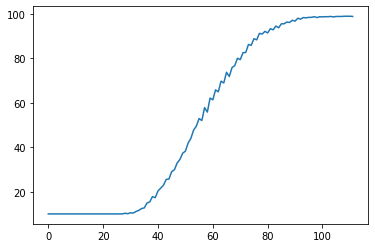

In [45]:
import matplotlib.pyplot as plt

plt.plot(accuracy)
plt.show()

In [48]:
import csv

csvfile = open('test.csv','w',newline="")

csvwriter = csv.writer(csvfile)
for row in [accuracy]:
    csvwriter.writerow(row)
    
csvfile.close()